# **Text Mining Research Project**

## Importing Packages and Datasets



In [ ]:
!pip install opendatasets
import opendatasets as od

!pip install tidytext
import tidytext

# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
# it seems there was an issue recently relating to tensorflow and Keras that broke the Top2Vec import:
    # https://github.com/tensorflow/probability/issues/1795
    # We attempt the workaround found here: https://github.com/tensorflow/tensorflow/releases/tag/v2.16.1
!pip install tf-keras~=2.16
import os
os.environ["TF_USE_LEGACY_KERAS"]="1"
import tf_keras as keras

# importing and installing the Top2Vec
# !pip install top2vec[sentence_encoders]
# from top2vec import Top2Vec

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import nltk
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3871 sha256=0eefac49e4c5653555e800f92ff031533326209979a45d941e48d68bfba7d8e9
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
april22 = pd.read_csv("/content/drive/MyDrive/files/0401_UkraineCombinedTweetsDeduped.csv")
may22 = pd.read_csv("/content/drive/MyDrive/files/0501_UkraineCombinedTweetsDeduped.csv")
june22 = pd.read_csv("/content/drive/MyDrive/files/0601_UkraineCombinedTweetsDeduped.csv")
july22 = pd.read_csv("/content/drive/MyDrive/files/0701_UkraineCombinedTweetsDeduped.csv")
aug22 = pd.read_csv("/content/drive/MyDrive/files/0801_UkraineCombinedTweetsDeduped.csv")
sept22 = pd.read_csv("/content/drive/MyDrive/files/0901_UkraineCombinedTweetsDeduped.csv")
oct22 = pd.read_csv("/content/drive/MyDrive/files/1001_UkraineCombinedTweetsDeduped.csv")
nov22 = pd.read_csv("/content/drive/MyDrive/files/1101_UkraineCombinedTweetsDeduped.csv")
dec22 = pd.read_csv("/content/drive/MyDrive/files/1201_UkraineCombinedTweetsDeduped.csv")
jan23 = pd.read_csv("/content/drive/MyDrive/files/20230101_UkraineCombinedTweetsDeduped.csv")
feb23 = pd.read_csv("/content/drive/MyDrive/files/20230201_UkraineCombinedTweetsDeduped.csv")
mar23 = pd.read_csv("/content/drive/MyDrive/files/20230301_UkraineCombinedTweetsDeduped.csv")
apr23 = pd.read_csv("/content/drive/MyDrive/files/20230401_UkraineCombinedTweetsDeduped.csv")
may23 = pd.read_csv("/content/drive/MyDrive/files/20230501_to_20230502_UkraineCombinedTweetsDeduped.csv")
june23 = pd.read_csv("/content/drive/MyDrive/files/20230601_UkraineCombinedTweetsDeduped.csv")

<ipython-input-3-4bfe7103f96f>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  april22 = pd.read_csv("/content/drive/MyDrive/files/0401_UkraineCombinedTweetsDeduped.csv")
<ipython-input-3-4bfe7103f96f>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  oct22 = pd.read_csv("/content/drive/MyDrive/files/1001_UkraineCombinedTweetsDeduped.csv")
<ipython-input-3-4bfe7103f96f>:13: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  apr23 = pd.read_csv("/content/drive/MyDrive/files/20230401_UkraineCombinedTweetsDeduped.csv")


## Cleaning Datasets

In [ ]:
# selecting tweets that are only in english
april_22 = april22.loc[april22["language"] == "en"]
may_22 = may22.loc[may22["language"] == "en"]
june_22 = june22.loc[june22["language"] == "en"]
july_22 = july22.loc[july22["language"] == "en"]
aug_22 = aug22.loc[aug22["language"] == "en"]
sept_22 = sept22.loc[sept22["language"] == "en"]
oct_22 = oct22.loc[oct22["language"] == "en"]
nov_22 = nov22.loc[nov22["language"] == "en"]
dec_22 = dec22.loc[dec22["language"] == "en"]
jan_23 = jan23.loc[jan23["language"] == "en"]
feb_23 = feb23.loc[feb23["language"] == "en"]
mar_23 = mar23.loc[mar23["language"] == "en"]
apr_23 = apr23.loc[apr23["language"] == "en"]
may_23 = may23.loc[may23["language"] == "en"]
june_23 = june23.loc[june23["language"] == "en"]

In [ ]:
# selecting columns that will only be helpful to us
april_22 = april_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
may_22 = may_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
june_22 = june_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
july_22 = july_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
aug_22 = aug_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
sept_22 = sept_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
oct_22 = oct_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
nov_22 = nov_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
dec_22 = dec_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
jan_23 = jan_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
feb_23 = feb_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
mar_23 = mar_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
apr_23 = apr_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
may_23 = may_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
june_23 = june_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]

# Word Counting

In [ ]:
# creating a new column called "retweets?" that contains a boolean of whether or not
# the tweet was retweeted
april_22["retweets?"] = april_22["retweetcount"] > 0
may_22["retweets?"] = may_22["retweetcount"] > 0
june_22["retweets?"] = june_22["retweetcount"] > 0
july_22["retweets?"] = july_22["retweetcount"] > 0
aug_22["retweets?"] = aug_22["retweetcount"] > 0
sept_22["retweets?"] = sept_22["retweetcount"] > 0
oct_22["retweets?"] = oct_22["retweetcount"] > 0
nov_22["retweets?"] = nov_22["retweetcount"] > 0
dec_22["retweets?"] = dec_22["retweetcount"] > 0
jan_23["retweets?"] = jan_23["retweetcount"] > 0
feb_23["retweets?"] = feb_23["retweetcount"] > 0
mar_23["retweets?"] = mar_23["retweetcount"] > 0
apr_23["retweets?"] = apr_23["retweetcount"] > 0
may_23["retweets?"] = may_23["retweetcount"] > 0
june_23["retweets?"] = june_23["retweetcount"] > 0

In [ ]:
# adding more words and symbols to our list of stop-words
my_stop = list(STOPWORDS)
my_stop.append("’")
my_stop.append("t")
my_stop.append("re")
my_stop.append("will")
my_stop.append("🧵116")
my_stop.append("⚡the")
my_stop.append("s")
my_stop.append("россиясмотри")
my_stop.append("⚠️")
my_stop.append("–")
my_stop.append("httpstcoeqqt8822zi")
my_stop.append("✅𝐋𝐈𝐕𝐄")
my_stop.append("link📲►")
my_stop.append("👉")
my_stop.append("t72b")
my_stop.append("dont")
my_stop.append("want")
my_stop.append("‘")
my_stop.append("https")
my_stop.append("link")

## April 2022

In [ ]:
april_22.head(3)

username  following  followers  totaltweets  \
0          Yaniela       1158        392        88366   
1         gregffff        122        881        99853   
2  ThanapornThon17        231         72         5481   

               tweetcreatedts  retweetcount  \
0  2022-04-01 00:00:00.000000          3412   
1  2022-04-01 00:00:00.000000           100   
2  2022-04-01 00:00:00.000000             9   

                                                text  \
0  ⚡The Ukrainian Air Force would like to address...   
1  Chernihiv oblast. Ukrainians welcome their lib...   
2  America 🇺🇸 is preparing for something worse th...   

                                            hashtags  retweets?  
0                                                 []       True  
1  [{'text': 'russianinvasion', 'indices': [77, 9...       True  
2  [{'text': 'RussianUkrainianWar', 'indices': [7...       True

### Relative Frequencies

In [ ]:
# splits each word in the tweet into separate tokens located in the column "word"
apr_22_df = tidytext.unnest_tokens(april_22, "word", "text")

In [ ]:
# keeps just the columns "no_hashtag" and "word"
apr_22_df = apr_22_df[ ["retweets?", "word"]]

In [ ]:
# gets rid of words that are in our stop-word list
apr_22_df = apr_22_df.loc[ ~apr_22_df["word"].isin(my_stop) ]

In [ ]:
# groups our words based on whether or not the tweets they're in have hashtags
apr_22_counts = apr_22_df.groupby("retweets?")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.0005
apr_22_counts = apr_22_counts[apr_22_counts > .0005]

In [ ]:
# formatting the dataframe better
apr_22_counts.name = "text_freq"
apr_22_counts = apr_22_counts.reset_index()

In [ ]:
apr_22_counts = apr_22_counts.pivot(index='word', columns="retweets?", values='text_freq')
apr_22_counts = apr_22_counts.reset_index()

In [ ]:
# fills all the NAs with something below the minimum value for True or False
apr_22_counts.loc[apr_22_counts[0].isna(), 0] = 0.0005/2
apr_22_counts.loc[apr_22_counts[1].isna(), 1]  = 0.0005/2

In [ ]:
# creating a new column "ratio" that is the ratio of the counts for True and False
apr_22_counts["ratio"] = apr_22_counts[1]/apr_22_counts[0]
apr_22_counts["logratio"] = np.log10(apr_22_counts["ratio"])

In [ ]:
#sorting so that we can see the words most strongly associated with retweets and without
apr_22_counts = apr_22_counts.sort_values("logratio", ascending = True)

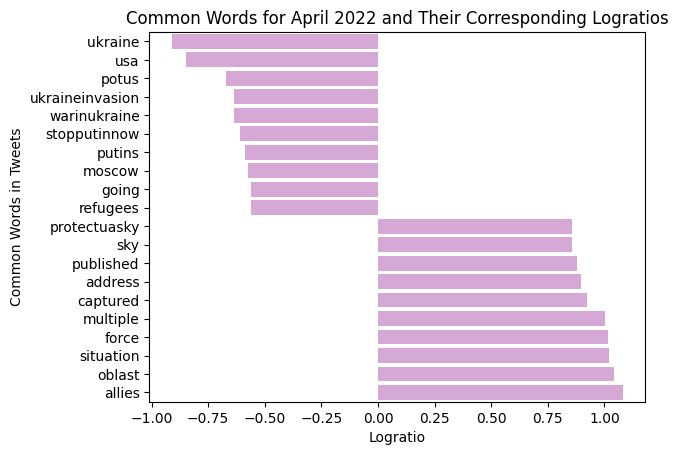

In [ ]:
april2022 = pd.concat([ apr_22_counts[0:10], apr_22_counts[-10:] ])

sns.barplot(data=april2022, x="logratio", y="word", color = "plum")
plt.xlabel("Logratio")
plt.ylabel("Common Words in Tweets")
plt.title("Common Words for April 2022 and Their Corresponding Logratios")
plt.show()

### TF - IDF

In [ ]:
t_counts = apr_22_df.groupby("retweets?")["word"].value_counts()
t_counts.name = "n"
t_counts = t_counts.reset_index()

In [ ]:
tfidf = tidytext.bind_tf_idf(t_counts, "word", "retweets?", "n")

In [ ]:
# TF IDF of top 10 tweets without retweets
tfidf.loc[ tfidf["retweets?"] == False].head(10)

retweets?              word      n        tf  idf  tf_idf
0      False           ukraine  25788  0.033752  0.0     0.0
1      False            russia  15628  0.020454  0.0     0.0
2      False           russian   8696  0.011382  0.0     0.0
3      False             putin   7765  0.010163  0.0     0.0
4      False               war   6985  0.009142  0.0     0.0
5      False  standwithukraine   5141  0.006729  0.0     0.0
6      False               amp   4117  0.005388  0.0     0.0
7      False         ukrainian   3850  0.005039  0.0     0.0
8      False                us   3231  0.004229  0.0     0.0
9      False            people   3029  0.003964  0.0     0.0

In [ ]:
# TF IDF of top 10 tweets with retweets
a22 = tfidf.loc[ tfidf["retweets?"] == True].head(10)
a22

retweets?              word       n        tf  idf  tf_idf
98120       True           ukraine  133820  0.032216  0.0     0.0
98121       True           russian   67947  0.016358  0.0     0.0
98122       True         ukrainian   50639  0.012191  0.0     0.0
98123       True            russia   50583  0.012177  0.0     0.0
98124       True              kyiv   27918  0.006721  0.0     0.0
98125       True               war   26816  0.006456  0.0     0.0
98126       True  standwithukraine   25880  0.006230  0.0     0.0
98127       True                🇺🇦   25568  0.006155  0.0     0.0
98128       True               amp   23359  0.005623  0.0     0.0
98129       True            forces   19289  0.004644  0.0     0.0

In [ ]:
kyiv = april_22[april_22['text'].str.contains('kyiv')]
kyiv.head(20)

username  following  followers  totaltweets  \
91          Alosh__83        246         12          932   
740         Alosh__83        246         12          932   
847         FerMunozM      14366      14404        51435   
895     milanmichlek2        167        101         5890   
933      MirnaelHajj2          5          0            6   
971      javierbauluz       2522      32393        41324   
1105         AdoptnAz       2435       1555        85595   
1171    milanmichlek2        167        101         5890   
1415  SSilencedVoices         43         23          172   
1543    milanmichlek2        167        101         5890   
1601          mroself       1285       1149        29151   
1630    milanmichlek2        167        101         5890   
1841        Alosh__83        246         12          932   
2423        Alosh__83        246         12          934   
2985          bmonsma        854        284          887   
3450        carlise_p       1510        954         5518   
5671     NewTemplar77        263         63        18939   
7060    mainichimarch       1234        159       161685   
7835         10kcrows       2799        463        35566   
8591        alagouajp        499        161        13250   

                  tweetcreatedts  retweetcount  \
91    2022-04-01 00:00:21.000000            10   
740   2022-04-01 00:03:21.000000             2   
847   2022-04-01 00:03:56.000000            17   
895   2022-04-01 00:04:09.000000             1   
933   2022-04-01 00:04:21.000000             2   
971   2022-04-01 00:04:34.000000            25   
1105  2022-04-01 00:05:15.000000            17   
1171  2022-04-01 00:05:37.000000             4   
1415  2022-04-01 00:06:51.000000             0   
1543  2022-04-01 00:07:30.000000             5   
1601  2022-04-01 00:07:51.000000            25   
1630  2022-04-01 00:07:59.000000             4   
1841  2022-04-01 00:09:11.000000            17   
2423  2022-04-01 00:12:29.000000             9   
2985  2022-04-01 00:15:38.000000             7   
3450  2022-04-01 00:18:16.000000            17   
5671  2022-04-01 00:30:33.000000             0   
7060  2022-04-01 00:38:23.000000            13   
7835  2022-04-01 00:42:41.000000            27   
8591  2022-04-01 00:46:17.000000             7   

                                                   text  \
91    Daily life in Zelensky's third Reich. Pic is f...   
740   Daily life in Zelensky's fascist Ukraine \n#Uk...   
847   Ukrainian fighters survey a disabled Russian a...   
895   A message to Khadirov from this two Nazi clown...   
933   Warning Graphic🔞🔞🔞\n\nMany #Russian soldiers b...   
971   Ukrainian soldiers have essentially retaken, f...   
1105  Ukrainian fighters survey a disabled Russian a...   
1171  Photo of a Azov member who survived the schoot...   
1415  The site is https://t.co/kIU4Kt9KKO and is alr...   
1543  Russian military work in the industrial zone o...   
1601  Ukrainian soldiers have essentially retaken, f...   
1630  DPR fighters captured an US humvee \n#Ukraine ...   
1841  What the western media hides from you!! Fashis...   
2423  "I thank Ramzan Kadyrov for helping us." Resid...   
2985  CNN: "Russian invader hits small children with...   
3450  Ukrainian fighters survey a disabled Russian a...   
5671  #warsaw #kyiv #lviv #ukrainian #kharkiv #odess...   
7060  Hostomel/Gostomel airport \n\n❌After 36 days o...   
7835  Ukrainian soldiers have essentially retaken, f...   
8591  CNN: "Russian invader hits small children with...   

                                               hashtags  retweets?  
91    [{'text': 'Ukraine', 'indices': [80, 88]}, {'t...       True  
740   [{'text': 'Ukraine', 'indices': [62, 70]}, {'t...       True  
847                                                  []       True  
895                                                  []       True  
933   [{'text': 'Russian', 'indices': [41, 49]}, {'t...       True  
971                                            

### General Word Counts

In [ ]:
# Top 10 Words Overall for Tweets in April 2022
apr_22_counts["word"].head(10)

352           ukraine️
360                usa
234              potus
372       warinukraine
344    ukraineinvasion
310       stopputinnow
247             putins
199             moscow
132              going
253           refugees
Name: word, dtype: object

In [ ]:
# Top 10 Words for Tweets Without Retweets in April 2022
apr_22_counts.sort_values(False)["word"].head(10)

16                  allies
257                 remain
286               services
246    putinisawarcriminal
206                 needed
362                   used
288                 shells
351         ukrainewillwin
113                 follow
7                        5
Name: word, dtype: object

In [ ]:
# Top 10 Word for Tweets With Retweets in April 2022
apr_22_counts.sort_values(True)["word"].head(10)

352         ukraine️
386        zelenskyy
380             work
251             real
40               btc
277    russiaukraine
134       government
68            crypto
304            start
137               gt
Name: word, dtype: object

## July 2022

In [ ]:
july_22.head(3)

username  following  followers  totaltweets  \
1      Foxmental_X       5623       6231       295444   
3  GainMoneyFaster       5672       5288        44683   
5      CommTimesSC       1816        500          493   

               tweetcreatedts  retweetcount  \
1  2022-07-01 00:00:00.000000             1   
3  2022-07-01 00:00:00.000000             0   
5  2022-07-01 00:00:00.000000             0   

                                                text  \
1  Cyberattack impacts unemployment benefits in s...   
3  Do you know anyone who uses the Web?\nYes, how...   
5  All the news you need and more.\nhttps://t.co/...   

                                            hashtags  retweets?  
1  [{'text': 'News', 'indices': [62, 67]}, {'text...       True  
3  [{'text': 'money', 'indices': [108, 114]}, {'t...      False  
5  [{'text': 'blackmedia', 'indices': [64, 75]}, ...      False

### Relative Frequencies

In [ ]:
# splits each word in the tweet into separate tokens located in the column "word"
july_22_df = tidytext.unnest_tokens(july_22, "word", "text")

In [ ]:
# keeps just the columns "no_hashtag" and "word"
july_22_df = july_22_df[ ["retweets?", "word"]]

In [ ]:
# gets rid of words that are in our stop-word list
july_22_df = july_22_df.loc[ ~july_22_df["word"].isin(my_stop) ]

In [ ]:
# groups our words based on whether or not the tweets they're in have hashtags
july_22_counts = july_22_df.groupby("retweets?")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.005
july_22_counts = july_22_counts[july_22_counts > .0005]

In [ ]:
# formatting the dataframe better
july_22_counts.name = "text_freq"
july_22_counts = july_22_counts.reset_index()

In [ ]:
july_22_counts = july_22_counts.pivot(index='word', columns="retweets?", values='text_freq')
july_22_counts = july_22_counts.reset_index()

In [ ]:
# fills all the NAs with something below the minimum value for True or False
july_22_counts.loc[july_22_counts[0].isna(), 0] = 0.0005/2
july_22_counts.loc[july_22_counts[1].isna(), 1]  = 0.0005/2

In [ ]:
july_22_counts["ratio"] = july_22_counts[1]/july_22_counts[0]
july_22_counts["logratio"] = np.log10(july_22_counts["ratio"])

In [ ]:
#sorting so that we can see the words most strongly associated with hashtags and without
july_22_counts = july_22_counts.sort_values("logratio", ascending = True)

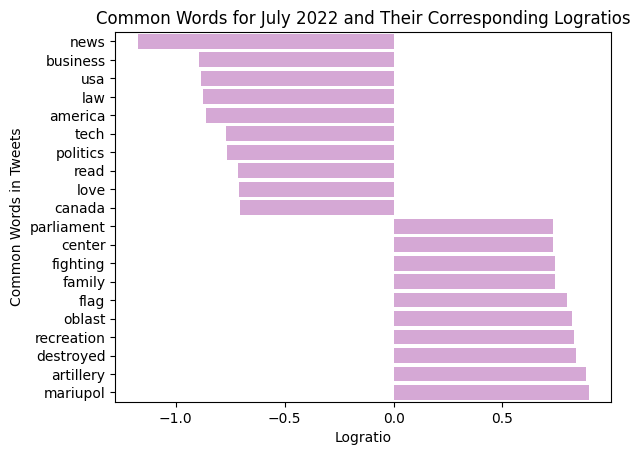

In [ ]:
july2022 = pd.concat([ july_22_counts[0:10], july_22_counts[-10:] ])

sns.barplot(data=july2022, x="logratio", y="word", color = "plum")
plt.xlabel("Logratio")
plt.ylabel("Common Words in Tweets")
plt.title("Common Words for July 2022 and Their Corresponding Logratios")
plt.show()

### TF - IDF

In [ ]:
t_counts = july_22_df.groupby("retweets?")["word"].value_counts()
t_counts.name = "n"
t_counts = t_counts.reset_index()

In [ ]:
tfidf = tidytext.bind_tf_idf(t_counts, "word", "retweets?", "n")

In [ ]:
# TF IDF of top 10 tweets without retweets
tfidf.loc[ tfidf["retweets?"] == False].head(10)

retweets?     word      n        tf  idf  tf_idf
0      False     news  11727  0.020277  0.0     0.0
1      False  ukraine   9044  0.015638  0.0     0.0
2      False   russia   5801  0.010031  0.0     0.0
3      False      usa   4758  0.008227  0.0     0.0
4      False  russian   3219  0.005566  0.0     0.0
5      False     nato   2878  0.004976  0.0     0.0
6      False    putin   2602  0.004499  0.0     0.0
7      False      war   2541  0.004394  0.0     0.0
8      False       us   2317  0.004006  0.0     0.0
9      False      amp   2229  0.003854  0.0     0.0

In [ ]:
# TF IDF of top tweets with retweets
tfidf.loc[ tfidf["retweets?"] == True ].head(10)

retweets?              word      n        tf  idf  tf_idf
93205       True           ukraine  47759  0.027687  0.0     0.0
93206       True           russian  23656  0.013714  0.0     0.0
93207       True            russia  21340  0.012371  0.0     0.0
93208       True         ukrainian  13911  0.008064  0.0     0.0
93209       True              nato  12520  0.007258  0.0     0.0
93210       True               amp  11860  0.006875  0.0     0.0
93211       True  standwithukraine   9404  0.005452  0.0     0.0
93212       True               war   9356  0.005424  0.0     0.0
93213       True             odesa   8179  0.004741  0.0     0.0
93214       True            people   7976  0.004624  0.0     0.0

### General Word Counts

In [ ]:
# Top 10 Words Overall for Tweets in July 2022
july_22_counts["word"].head(10)

246        news
64     business
376         usa
198         law
24      america
346        tech
271    politics
277        read
214        love
65       canada
Name: word, dtype: object

In [ ]:
# Top 10 Words for Tweets Without Retweets in July 2022
july_22_counts.sort_values(False)["word"].head(10)

79         completely
39             asking
99             doesnt
280           realise
353             three
289    robertametsola
77               come
189              kill
113            enters
47             become
Name: word, dtype: object

In [ ]:
# Top 10 Word for Tweets With Retweets in July 2022
july_22_counts.sort_values(True)["word"].head(10)

139        friday
37        article
358    topstories
322         stand
248       newyork
118          even
390       weekend
359      trending
387           way
10            4th
Name: word, dtype: object

## October 2022

In [ ]:
oct_22.head(3)

username  following  followers  totaltweets       tweetcreatedts  \
1       PLinSydney        405       2029         9294  2022-10-01 00:00:01   
4  Robert__Menzies         23          0          209  2022-10-01 00:00:02   
7     HalinaSapeha       1642        874          683  2022-10-01 00:00:04   

   retweetcount                                               text  \
1             1  🎹 🎻 🥁 On International Music Day see how 🇵🇱 pr...   
4             0  If ww3 breaks out, would you fight for your co...   
7             0  @McFaul #Putin &amp; his associates do not car...   

                                            hashtags  retweets?  
1  [{'text': 'InternationalMusicDay', 'indices': ...       True  
4  [{'text': 'WWIII', 'indices': [52, 58]}, {'tex...      False  
7  [{'text': 'Putin', 'indices': [8, 14]}, {'text...      False

### Relative Frequencies

In [ ]:
# splits each word in the tweet into separate tokens located in the column "word"
oct_22_df = tidytext.unnest_tokens(oct_22, "word", "text")

In [ ]:
# keeps just the columns "no_hashtag" and "word"
oct_22_df = oct_22_df[ ["retweets?", "word"]]

In [ ]:
# gets rid of words that are in our stop-word list
oct_22_df = oct_22_df.loc[ ~oct_22_df["word"].isin(my_stop) ]

In [ ]:
# groups our words based on whether or not the tweets they're in have hashtags
oct_22_counts = oct_22_df.groupby("retweets?")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.005
oct_22_counts = oct_22_counts[oct_22_counts > .0005]

In [ ]:
# formatting the dataframe better
oct_22_counts.name = "text_freq"
oct_22_counts = oct_22_counts.reset_index()

In [ ]:
oct_22_counts = oct_22_counts.pivot(index='word', columns="retweets?", values='text_freq')
oct_22_counts = oct_22_counts.reset_index()

In [ ]:
# fills all the NAs with something below the minimum value for True or False
oct_22_counts.loc[oct_22_counts[0].isna(), 0] = 0.0005/2
oct_22_counts.loc[oct_22_counts[1].isna(), 1]  = 0.0005/2

In [ ]:
oct_22_counts["ratio"] = oct_22_counts[1]/oct_22_counts[0]
oct_22_counts["logratio"] = np.log10(oct_22_counts["ratio"])

In [ ]:
#sorting so that we can see the words most strongly associated with hashtags and without
oct_22_counts = oct_22_counts.sort_values("logratio", ascending = True)

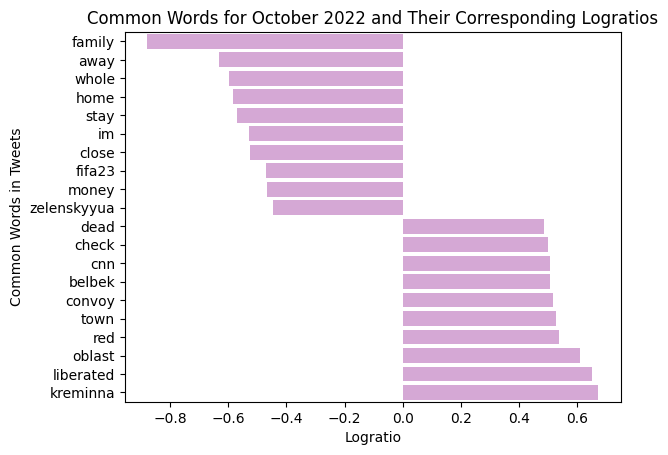

In [ ]:
oct2022 = pd.concat([ oct_22_counts[0:10], oct_22_counts[-10:] ])

sns.barplot(data=oct2022, x="logratio", y="word", color = "plum")
plt.xlabel("Logratio")
plt.ylabel("Common Words in Tweets")
plt.title("Common Words for October 2022 and Their Corresponding Logratios")
plt.show()

### TF - IDF

In [ ]:
t_counts = oct_22_df.groupby("retweets?")["word"].value_counts()
t_counts.name = "n"
t_counts = t_counts.reset_index()

In [ ]:
tfidf = tidytext.bind_tf_idf(t_counts, "word", "retweets?", "n")

In [ ]:
# TF IDF of top 10 tweets without retweets
tfidf.loc[ tfidf["retweets?"] == False].head(10)

retweets?        word      n        tf  idf  tf_idf
0      False     ukraine  11572  0.030401  0.0     0.0
1      False      russia   8418  0.022115  0.0     0.0
2      False       putin   6135  0.016118  0.0     0.0
3      False     russian   3464  0.009100  0.0     0.0
4      False        nato   2786  0.007319  0.0     0.0
5      False       lyman   2703  0.007101  0.0     0.0
6      False         war   2415  0.006345  0.0     0.0
7      False   ukrainian   1830  0.004808  0.0     0.0
8      False         amp   1797  0.004721  0.0     0.0
9      False  ukrainewar   1471  0.003865  0.0     0.0

In [ ]:
# TF IDF of top 10 tweets with retweets
tfidf.loc[ tfidf["retweets?"] == True].head(10)

retweets?        word     n        tf  idf  tf_idf
58726       True     ukraine  4034  0.030330  0.0     0.0
58727       True      russia  2443  0.018368  0.0     0.0
58728       True       lyman  1784  0.013413  0.0     0.0
58729       True     russian  1627  0.012233  0.0     0.0
58730       True       putin  1488  0.011188  0.0     0.0
58731       True   ukrainian  1101  0.008278  0.0     0.0
58732       True        nato   704  0.005293  0.0     0.0
58733       True         war   653  0.004910  0.0     0.0
58734       True         amp   616  0.004632  0.0     0.0
58735       True  ukrainewar   609  0.004579  0.0     0.0

### General Word Counts

In [ ]:
# Top 10 Words Overall for Tweets in October 2022
oct_22_counts["word"].head(10)

75          family
27            away
289          whole
108           home
234           stay
113             im
42           close
76          fifa23
158          money
302    zelenskyyua
Name: word, dtype: object

In [ ]:
# Top 10 Words for Tweets Without Retweets in October 2022
oct_22_counts.sort_values(False)["word"].head(10)

128     kreminna
89       general
33      captured
226         shot
87          full
61        donbas
34          cars
86         front
39      civilian
8      according
Name: word, dtype: object

In [ ]:
# Top 10 Word for Tweets With Retweets in October 2022
oct_22_counts.sort_values(True)["word"].head(10)

75                family
150                 made
147                lover
15     anikulapothemovie
59                dinner
114            important
140                 life
191         protagonists
196                 real
167                needs
Name: word, dtype: object

## January 2023

In [ ]:
jan_23.head(3)

username  following  followers  totaltweets       tweetcreatedts  \
1  eldoggo75710233        160         51           39  2023-01-01 00:00:00   
2      christoalnz       2080       1203        14862  2023-01-01 00:00:02   
6         Sytheruk        729       1207         7069  2023-01-01 00:00:03   

   retweetcount                                               text  \
1             0  Full video, I dare you not to shed a single te...   
2             0  @RusMission_EU @mfa_russia @RusMission_OIC @am...   
6            10  Happy New Year to you all! From the UK! 🇬🇧 Wha...   

                                            hashtags  retweets?  
1  [{'text': 'UkraineWillWin', 'indices': [75, 90]}]      False  
2       [{'text': 'Russian', 'indices': [326, 334]}]      False  
6  [{'text': 'Ukraine', 'indices': [112, 120]}, {...       True

### Relative Frequencies

In [ ]:
# splits each word in the tweet into separate tokens located in the column "word"
jan_23_df = tidytext.unnest_tokens(jan_23, "word", "text")

In [ ]:
# keeps just the columns "no_hashtag" and "word"
jan_23_df = jan_23_df[ ["retweets?", "word"]]

In [ ]:
# gets rid of words that are in our stop-word list
jan_23_df = jan_23_df.loc[ ~jan_23_df["word"].isin(my_stop) ]

In [ ]:
# groups our words based on whether or not the tweets they're in have hashtags
jan_23_counts = jan_23_df.groupby("retweets?")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.005
jan_23_counts = jan_23_counts[jan_23_counts > .0005]

In [ ]:
# formatting the dataframe better
jan_23_counts.name = "text_freq"
jan_23_counts = jan_23_counts.reset_index()

In [ ]:
jan_23_counts = jan_23_counts.pivot(index='word', columns="retweets?", values='text_freq')
jan_23_counts = jan_23_counts.reset_index()

In [ ]:
# fills all the NAs with something below the minimum value for True or False
jan_23_counts.loc[jan_23_counts[0].isna(), 0] = 0.0005/2
jan_23_counts.loc[jan_23_counts[1].isna(), 1]  = 0.0005/2

In [ ]:
jan_23_counts["ratio"] = jan_23_counts[1]/jan_23_counts[0]
jan_23_counts["logratio"] = np.log10(jan_23_counts["ratio"])

In [ ]:
#sorting so that we can see the words most strongly associated with hashtags and without
jan_23_counts = jan_23_counts.sort_values("logratio", ascending = True)

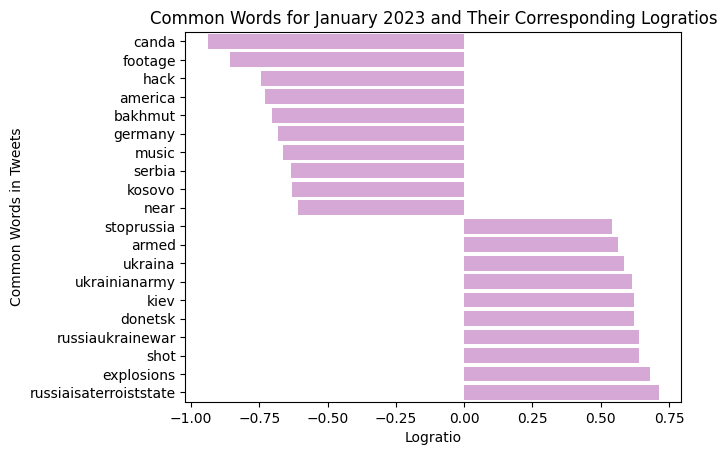

In [ ]:
jan2023 = pd.concat([ jan_23_counts[0:10], jan_23_counts[-10:] ])

sns.barplot(data=jan2023, x="logratio", y="word", color = "plum")
plt.xlabel("Logratio")
plt.ylabel("Common Words in Tweets")
plt.title("Common Words for January 2023 and Their Corresponding Logratios")
plt.show()

### TF - IDF

In [ ]:
t_counts = jan_23_df.groupby("retweets?")["word"].value_counts()
t_counts.name = "n"
t_counts = t_counts.reset_index()

In [ ]:
tfidf = tidytext.bind_tf_idf(t_counts, "word", "retweets?", "n")

In [ ]:
# TF IDF of top 10 tweets without retweets
tfidf.loc[ tfidf["retweets?"] == False].head(10)

retweets?          word     n        tf  idf  tf_idf
0      False       ukraine  9796  0.028513  0.0     0.0
1      False           new  4675  0.013607  0.0     0.0
2      False          year  4672  0.013598  0.0     0.0
3      False        canada  4323  0.012583  0.0     0.0
4      False       germany  3818  0.011113  0.0     0.0
5      False        russia  3624  0.010548  0.0     0.0
6      False       bakhmut  3311  0.009637  0.0     0.0
7      False       russian  3300  0.009605  0.0     0.0
8      False  happynewyear  3074  0.008947  0.0     0.0
9      False       america  2821  0.008211  0.0     0.0

In [ ]:
# TF IDF of top 10 tweets with retweets
tfidf.loc[ tfidf["retweets?"] == True].head(10)

retweets?       word     n        tf  idf  tf_idf
57980       True    ukraine  2115  0.024825  0.0     0.0
57981       True     russia  1098  0.012888  0.0     0.0
57982       True        new  1074  0.012606  0.0     0.0
57983       True       year  1015  0.011913  0.0     0.0
57984       True    russian   661  0.007758  0.0     0.0
57985       True        amp   591  0.006937  0.0     0.0
57986       True       kyiv   530  0.006221  0.0     0.0
57987       True       2023   501  0.005880  0.0     0.0
57988       True  ukrainian   428  0.005024  0.0     0.0
57989       True      happy   421  0.004941  0.0     0.0

### General Word Counts

In [ ]:
# Top 10 Words Overall for Tweets in January 2023
jan_23_counts["word"].head(10)

37       canda
80     footage
98        hack
13     america
25     bakhmut
88     germany
155      music
202     serbia
125     kosovo
160       near
Name: word, dtype: object

In [ ]:
# Top 10 Words for Tweets Without Retweets in January 2023
jan_23_counts.sort_values(False)["word"].head(10)

190    russiaisaterroiststate
129                      left
26                    bandera
7                           4
112              intelligence
242                  ukraines
236                       two
114                  invasion
128                  launched
276                 zelenskyy
Name: word, dtype: object

In [ ]:
# Top 10 Word for Tweets With Retweets in January 2023
jan_23_counts.sort_values(True)["word"].head(10)

37       canda
183      radio
264       west
2           18
28      battle
104     health
274    youtube
253    usavirn
206    soldier
208      spain
Name: word, dtype: object

## April 2023

In [ ]:
apr_23.head(3)

username  following  followers  totaltweets       tweetcreatedts  \
0   NewAmericanMag        695      15000        23551  2023-04-01 00:00:00   
1  BlondellGammid1          7      21774          412  2023-04-01 00:00:00   
2    ripeworldnews          1         24         2384  2023-04-01 00:00:00   

   retweetcount                                               text  \
0             0  As China gears up for war, the United States i...   
1             0  🇺🇦Ukraine War Footage 🔥🔥🔥🔥\n\n➡️➡️➡️ Follow fo...   
2             0  British Intelligence #UkraineRussiaWar map as ...   

                                            hashtags  retweets?  
0  [{'text': 'china', 'indices': [71, 77]}, {'tex...      False  
1  [{'text': 'UkraineWar', 'indices': [85, 96]}, ...      False  
2  [{'text': 'UkraineRussiaWar', 'indices': [21, ...      False

### Relative Frequencies

In [ ]:
# splits each word in the tweet into separate tokens located in the column "word"
apr_23_df = tidytext.unnest_tokens(apr_23, "word", "text")

In [ ]:
# keeps just the columns "no_hashtag" and "word"
apr_23_df = apr_23_df[ ["retweets?", "word"]]

In [ ]:
# gets rid of words that are in our stop-word list
apr_23_df = apr_23_df.loc[ ~apr_23_df["word"].isin(my_stop) ]

In [ ]:
# groups our words based on whether or not the tweets they're in have hashtags
apr_23_counts = apr_23_df.groupby("retweets?")["word"].value_counts(normalize=True)

In [ ]:
# keep anything with a count > 0.005
apr_23_counts = apr_23_counts[apr_23_counts > .0005]

In [ ]:
# formatting the dataframe better
apr_23_counts.name = "text_freq"
apr_23_counts = apr_23_counts.reset_index()

In [ ]:
apr_23_counts = apr_23_counts.pivot(index='word', columns="retweets?", values='text_freq')
apr_23_counts = apr_23_counts.reset_index()

In [ ]:
# fills all the NAs with something below the minimum value for True or False
apr_23_counts.loc[apr_23_counts[0].isna(), 0] = 0.0005/2
apr_23_counts.loc[apr_23_counts[1].isna(), 1]  = 0.0005/2

In [ ]:
apr_23_counts["ratio"] = apr_23_counts[1]/apr_23_counts[0]
apr_23_counts["logratio"] = np.log10(apr_23_counts["ratio"])

In [ ]:
#sorting so that we can see the words most strongly associated with hashtags and without
apr_23_counts = apr_23_counts.sort_values("logratio", ascending = True)

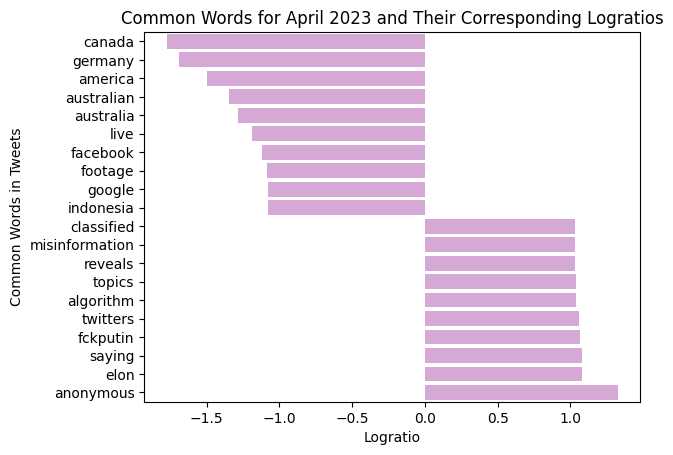

In [ ]:
april2023 = pd.concat([ apr_23_counts[0:10], apr_23_counts[-10:] ])

sns.barplot(data=april2023, x="logratio", y="word", color = "plum")
plt.xlabel("Logratio")
plt.ylabel("Common Words in Tweets")
plt.title("Common Words for April 2023 and Their Corresponding Logratios")
plt.show()

### TF - IDF

In [ ]:
t_counts = apr_23_df.groupby("retweets?")["word"].value_counts()
t_counts.name = "n"
t_counts = t_counts.reset_index()

In [ ]:
tfidf = tidytext.bind_tf_idf(t_counts, "word", "retweets?", "n")

In [ ]:
# TF IDF of top 10 tweets without retweets
tfidf.loc[ tfidf["retweets?"] == False].head(10)

retweets?       word      n        tf  idf  tf_idf
0      False    ukraine  10728  0.026798  0.0     0.0
1      False     canada   5950  0.014863  0.0     0.0
2      False     russia   5704  0.014248  0.0     0.0
3      False    bakhmut   5069  0.012662  0.0     0.0
4      False    germany   4887  0.012207  0.0     0.0
5      False    russian   4018  0.010037  0.0     0.0
6      False        war   3336  0.008333  0.0     0.0
7      False        usa   3241  0.008096  0.0     0.0
8      False    america   3155  0.007881  0.0     0.0
9      False  ukrainian   2480  0.006195  0.0     0.0

In [ ]:
# TF IDF of top 10 tweets with retweets
tfidf.loc[ tfidf["retweets?"] == True].head(10)

retweets?                     word      n        tf  idf  tf_idf
59971       True                  ukraine  35635  0.026944  0.0     0.0
59972       True                   russia  29668  0.022432  0.0     0.0
59973       True                  russian  13085  0.009894  0.0     0.0
59974       True       russiaiscollapsing  10815  0.008177  0.0     0.0
59975       True  russiaisaterroriststate   9841  0.007441  0.0     0.0
59976       True                ukrainian   9722  0.007351  0.0     0.0
59977       True                     nato   9571  0.007237  0.0     0.0
59978       True                      amp   9088  0.006872  0.0     0.0
59979       True                       un   8110  0.006132  0.0     0.0
59980       True                anonymous   6981  0.005278  0.0     0.0

### General Word Counts

In [ ]:
# Top 10 Words Overall for Tweets in April 2023
apr_23_counts["word"].head(10)

67         canada
148       germany
21        america
39     australian
38      australia
222          live
124      facebook
134       footage
156        google
191     indonesia
Name: word, dtype: object

In [ ]:
# Top 10 Words for Tweets Without Retweets in April 2023
apr_23_counts.sort_values(False)["word"].head(10)

149            gets
377        ukraines
44       banbelarus
204           kills
278        platform
263    olympicgames
290       providing
287          prison
192       influence
267       operation
Name: word, dtype: object

In [ ]:
# Top 10 Word for Tweets With Retweets in April 2023
apr_23_counts.sort_values(True)["word"].head(10)

67         canada
314          says
157         gopro
143         front
111      essaypay
421             ‘
332         state
417       youtube
62          brics
158    government
Name: word, dtype: object

# Topic Modeling

In [ ]:
#copy of original data frame
apr_22_df = april_22[ ["username", "following", "followers","totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
may_22_df = may_22[ [ "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
june_22_df = june_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
july_22_df = july_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
aug_22_df = aug_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
sept_22_df = sept_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
oct_22_df = oct_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
nov_22_df = nov_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
dec_22_df = dec_22[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
jan_23_df = jan_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
feb_23_df = feb_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
mar_23_df = mar_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
apr_23_df = apr_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
may_23_df = may_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]
june_23_df = june_23[ ["username", "following", "followers", "totaltweets", "tweetcreatedts", "retweetcount", "text", "hashtags"] ]

##April 2022

In [ ]:
#got rid of stop words in the tweets
apr_22_df = apr_22_df.loc[ ~apr_22_df["text"].isin(my_stop) ]


###LDA

In [ ]:
april_22_no_https = april_22.drop(april_22[april_22['text'].str.contains("https")].index)
#removed any text containing websites so "https" would not come up as a frequent word.
#no tweets with websites were used

In [ ]:
April22 = Pipeline([
     ('tokenize', CountVectorizer(max_features=280, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=9))
    ])
#Tweet size max is 280 as of Jan. 2023  number of topics chosen was 9.

In [ ]:
np.random.seed(24601)

April22.fit_transform(april_22_no_https["text"]);

In [ ]:

def plot_top_words(pipeline, n_top_words=10, grid_shape=[3,3]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='purple')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 25})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)


    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle("April 2022 Topics", fontsize=35)

    plt.show()

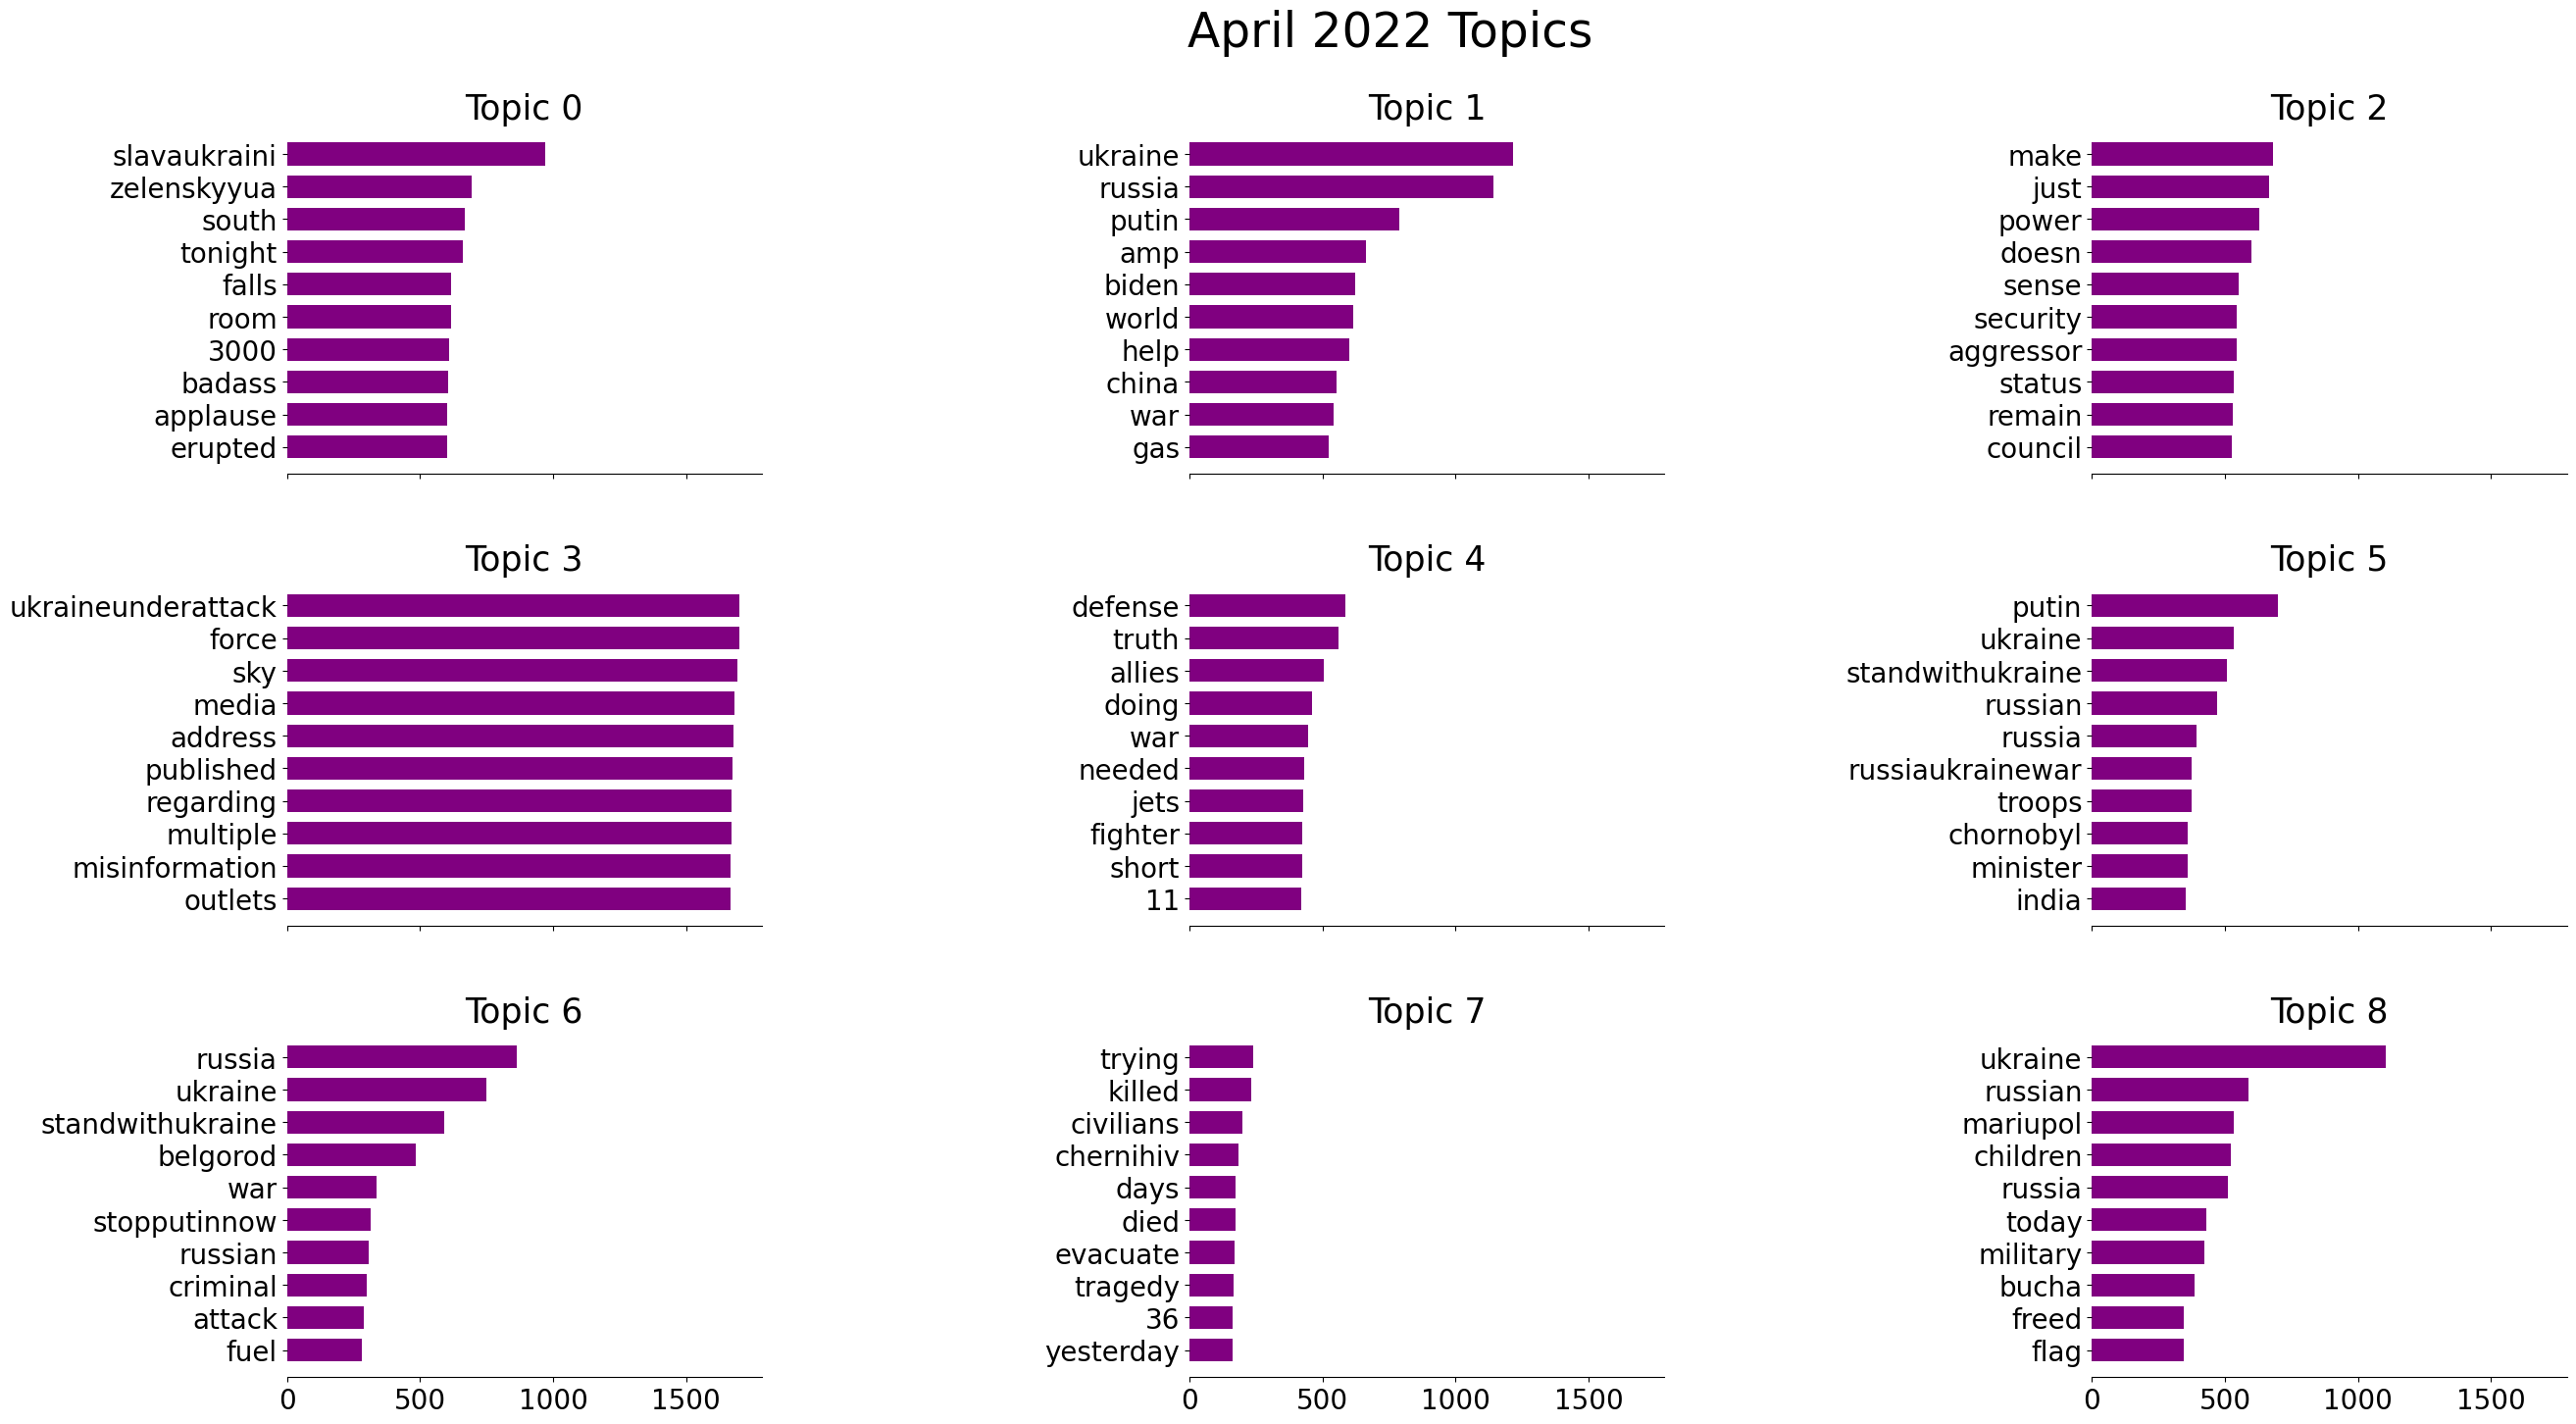

In [ ]:
plot_top_words(April22, 10, [3,3])
#Topic 7 is about deaths and tragedies, Topic 3 is about media, #topic is about world powers

###Top2Vec

In [ ]:
documents_apr22 = list(april_22_no_https["text"])
model_apr22 = Top2Vec(documents_apr22, embedding_model='universal-sentence-encoder')

2024-04-09 17:35:43,895 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-09 17:35:50,827 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-09 17:36:15,457 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-09 17:36:35,639 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-09 17:39:26,493 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. o

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_apr22.search_topics(keywords=["defense"], num_topics=5)
topic_words
#The word defense was chosen, as shown in topic 4 and was used to see how another topic with this word may compare/differ



[array(['donetsk', 'militarily', 'donbass', 'kyiv', 'kiev', 'troops',
        'army', 'mariupol', 'azov', 'rus', 'ukrainians', 'tactical',
        'battles', 'tactics', 'fighting', 'artillery', 'russia', 'combat',
        'generals', 'defence', 'ukrainian', 'lavrov', 'military',
        'ukraine', 'retreating', 'crimea', 'defense', 'stalemate',
        'battle', 'fight', 'strategy', 'kharkiv', 'armoured', 'soldiers',
        'territorial', 'kharkov', 'armed', 'shelling', 'kaliningrad',
        'regiment', 'conscripts', 'convoys', 'kremlin', 'luhansk',
        'moscow', 'putins', 'fights', 'invaded', 'territory', 'siege'],
       dtype='<U15'),
 array(['donetsk', 'missiles', 'artillery', 'donbass', 'missile',
        'ukraine', 'mariupol', 'armored', 'kyiv', 'shelling', 'russia',
        'crimea', 'putins', 'kremlin', 'militarily', 'armoured', 'kharkov',
        'medvedev', 'ukrainian', 'kiev', 'ukrainians', 'nato',
        'conscripts', 'lavrov', 'convoys', 'helos', 'soviet', 'munition

In [ ]:
topic_nums

array([183,  59, 164, 249, 392])

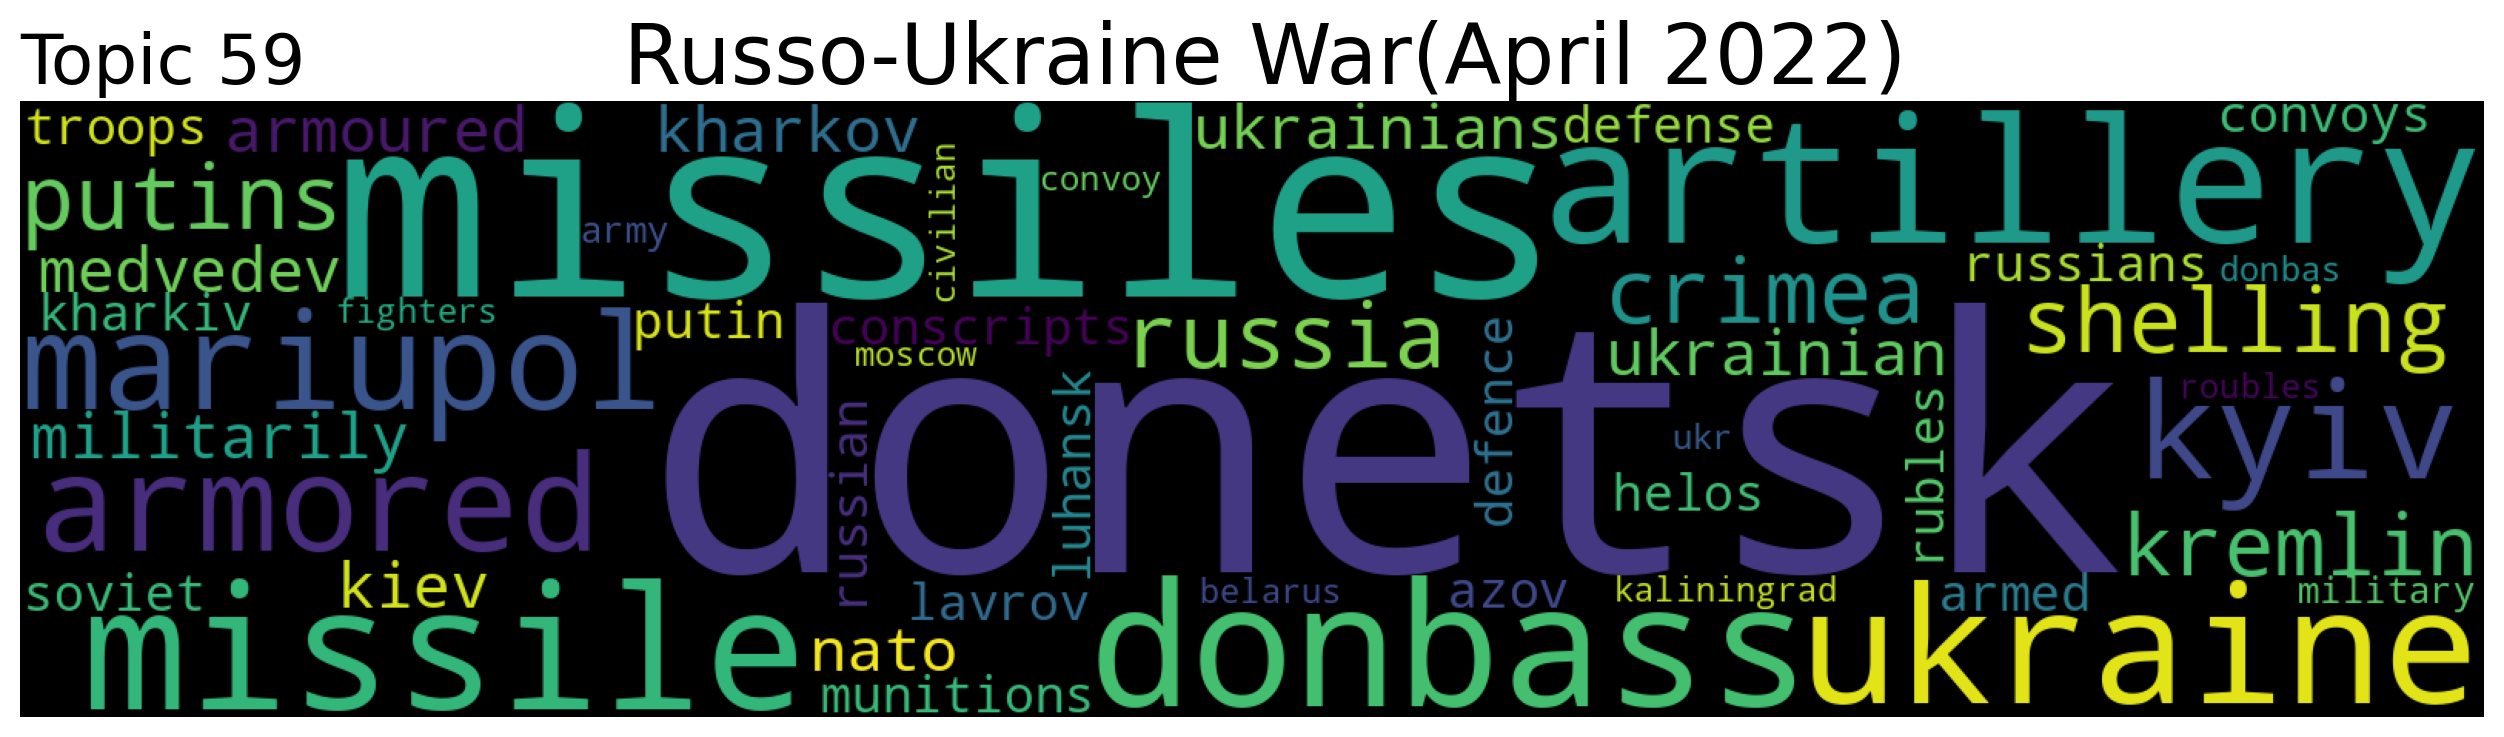

In [ ]:
model_apr22.generate_topic_wordcloud(59)

plt.title(" Russo-Ukraine War(April 2022)", fontsize = "30")
plt.show()
#Chose Topic 79. Donetsk and military equipment

In [ ]:
topic_words, word_scores, topic_nums = model_apr22.get_topics(60)
topic_num=59
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10)
#high prevalence of people tweeting about military equpment. Russia launched attack on Donetsk in April 2022

0
0.446292    donetsk
0.382110   missiles
0.377829  artillery
0.366512    donbass
0.361141    missile
0.344747    ukraine
0.341547   mariupol
0.339427    armored
0.337712       kyiv
0.335112   shelling

##July 2022

In [ ]:
#got rid of stop words in the tweets
july_22_df = july_22_df.loc[ ~july_22_df["text"].isin(my_stop) ]

###LDA

In [ ]:
july_22_df = july_22_df.drop(july_22_df[july_22_df['text'].str.contains("https")].index)
#removed any text containing websites so "https" would not come up as a frequent word.
#no tweets with websites were used

In [ ]:
July22 = Pipeline([
     ('tokenize', CountVectorizer(max_features=280, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=9))
    ])
#Tweet size max is 280 as of Jan. 2023,  number of topics is 9.

In [ ]:
np.random.seed(24601)

July22.fit_transform(july_22_df["text"]);

In [ ]:

def plot_top_words(pipeline, n_top_words=10, grid_shape=[5,3]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='purple')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)


    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle("July 2022 Topics", fontsize=35)
    plt.show()

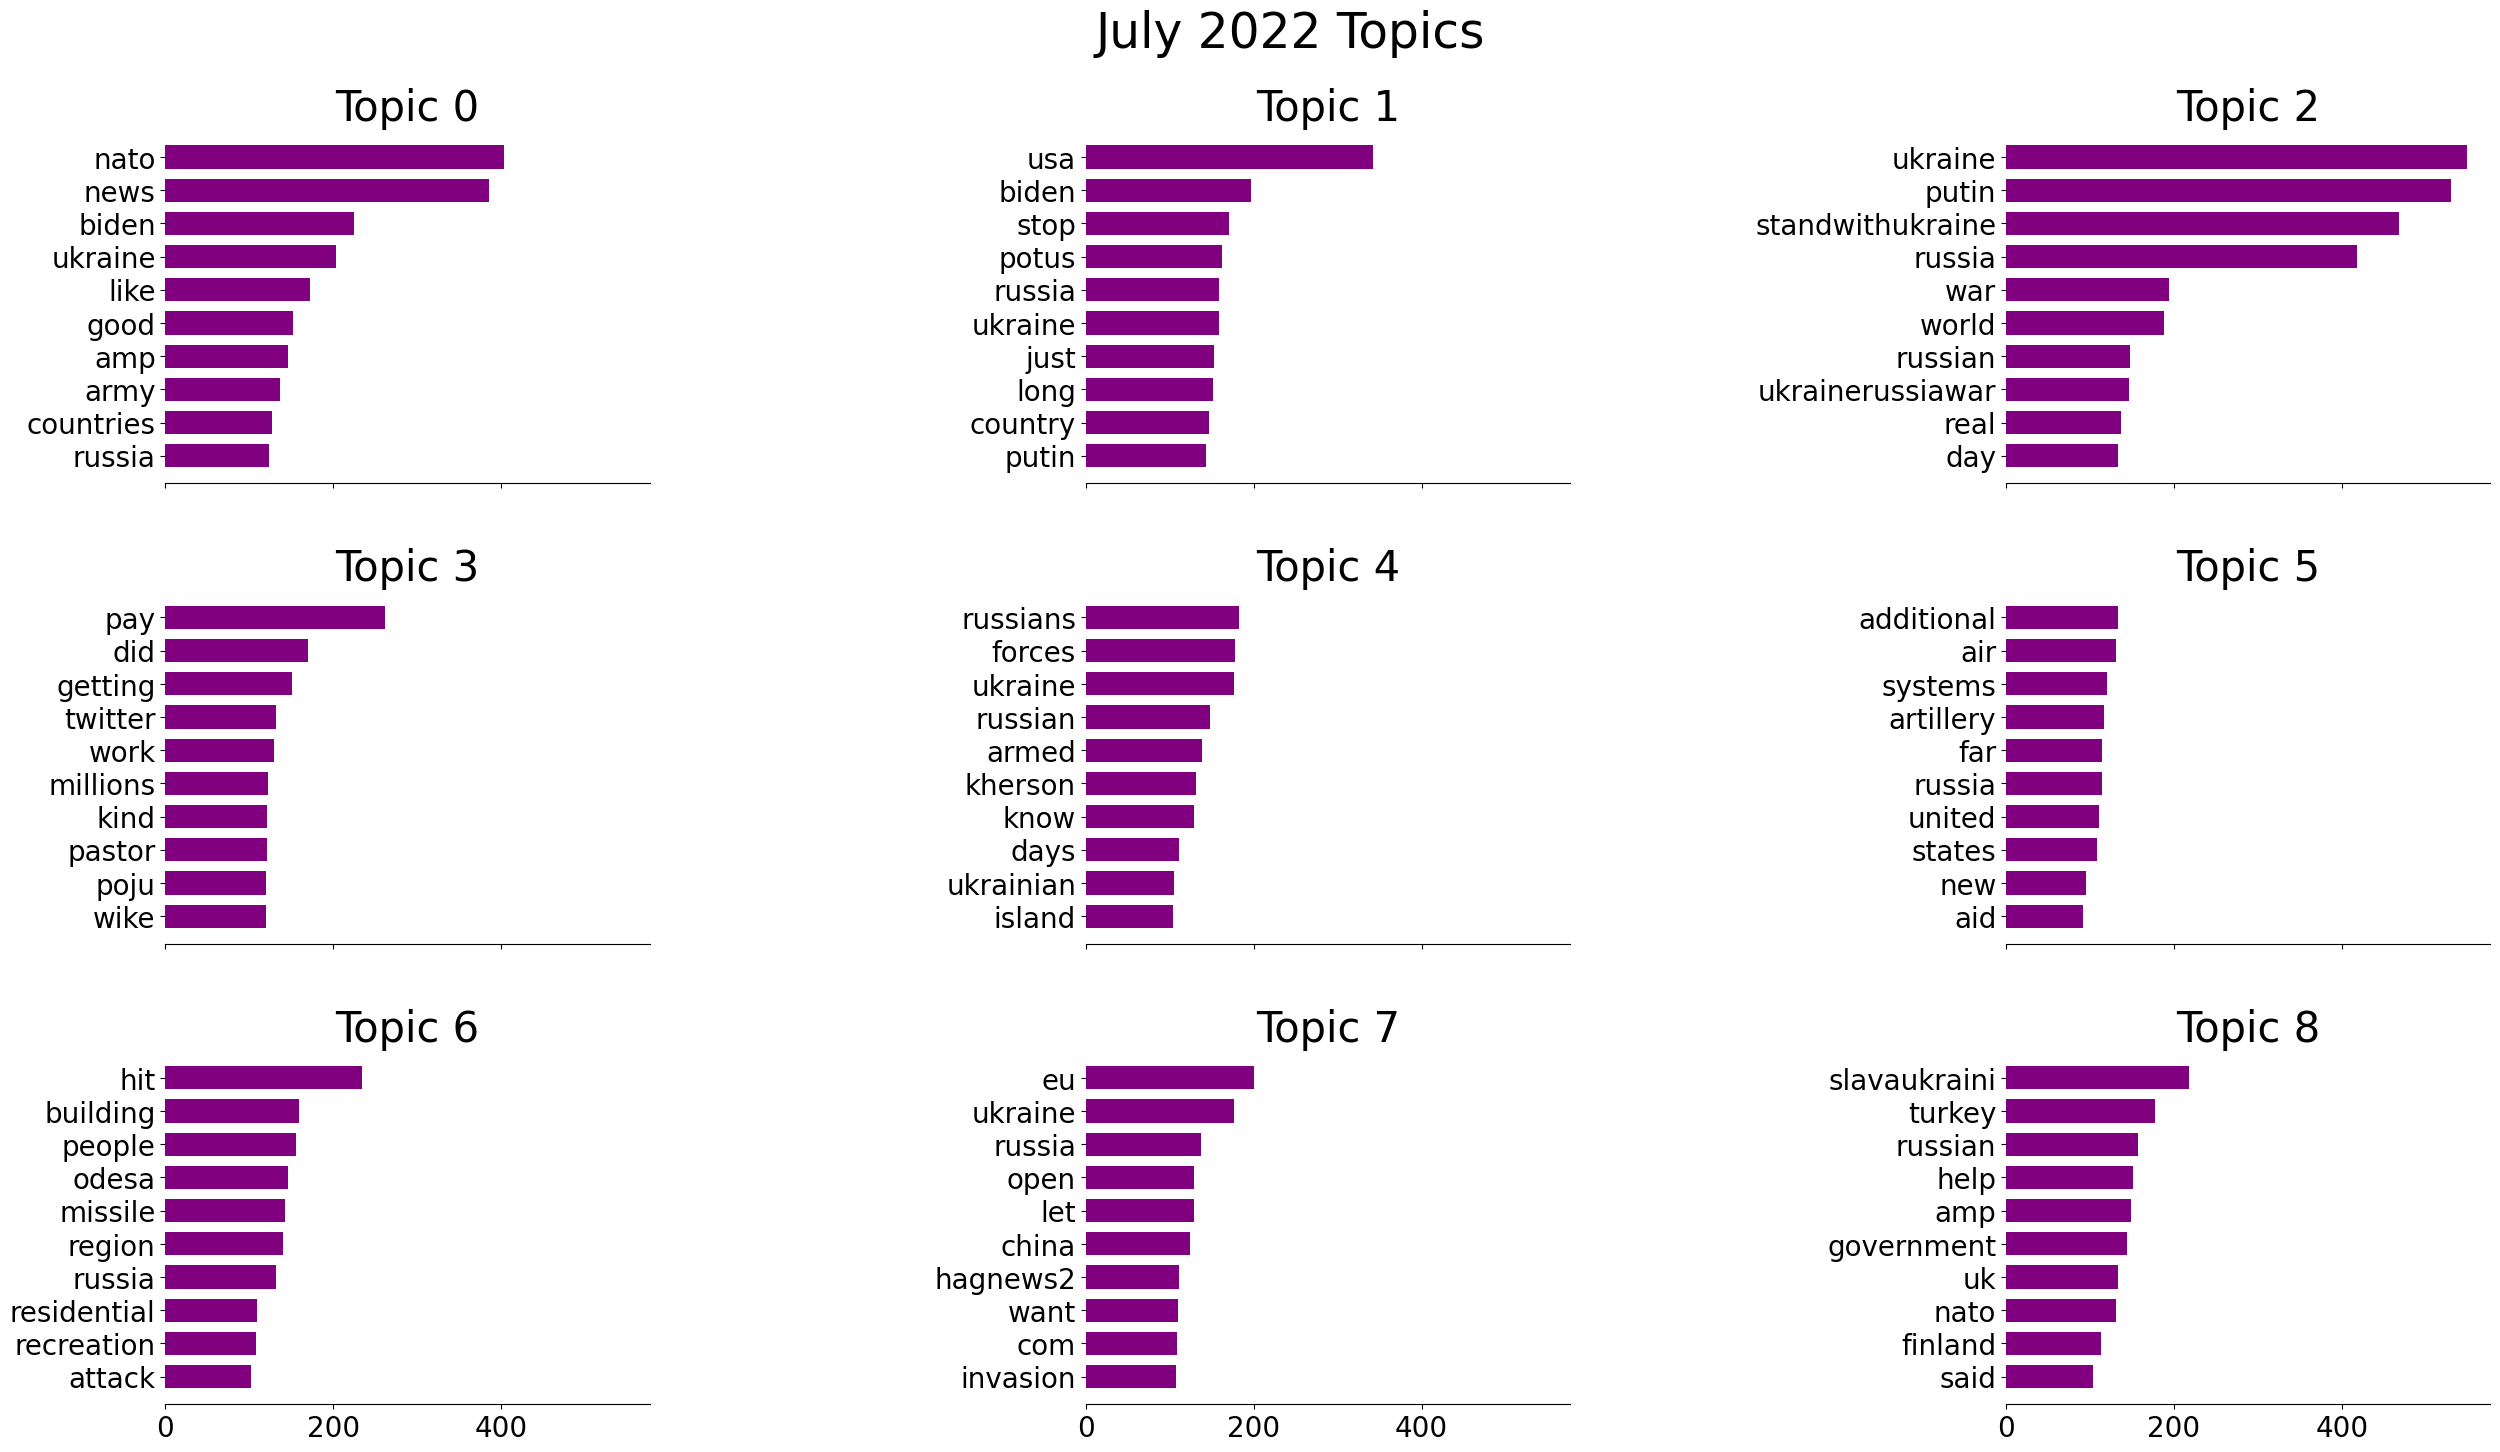

In [ ]:
plot_top_words(July22, 10, [3,3])
#Topic 6 is about an attack, Topic 1 involves the US, and Topic 2 is about Russia vs Ukraine

###Top2Vec

In [ ]:
documents_july22 = list(july_22_df["text"])
model_july22 = Top2Vec(documents_july22, embedding_model='universal-sentence-encoder')

2024-04-09 17:42:38,652 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-09 17:42:40,744 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-09 17:42:49,429 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-09 17:42:57,006 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-09 17:43:28,033 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-09 17:43:29,138 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_july22.search_topics(keywords=["US"], num_topics=5)
topic_words
#The word "US" was chosen as shown in Topic 1, and to see how it may compare/differ

[array(['america', 'usa', 'gop', 'trump', 'americans', 'american',
        'scotus', 'potus', 'democrats', 'dnc', 'freedom', 'us',
        'democratic', 'liberal', 'states', 'democracy', 'antifa',
        'foxnews', 'tyranny', 'politics', 'worldnews', 'nation',
        'congress', 'president', 'senate', 'protesting', 'elections',
        'united', 'fbi', 'protest', 'biden', 'reuters', 'judicial', 'iran',
        'political', 'nations', 'based', 'citizens', 'pentagon',
        'totalitarian', 'national', 'cia', 'mexico', 'country', 'macron',
        'terrorism', 'canada', 'filibuster', 'afghanistan', 'france'],
       dtype='<U15'),
 array(['putin', 'united', 'lavrov', 'us', 'allies', 'kremlin',
        'democrats', 'congress', 'opposition', 'solidarity', 'gop',
        'scotus', 'overthrown', 'politics', 'hate', 'together',
        'democracy', 'relations', 'nato', 'america', 'combined',
        'overthrow', 'pacts', 'eu', 'union', 'pentagon', 'power', 'macron',
        'enemy', 'total

In [ ]:
topic_nums

array([183,  59, 164, 249, 392])

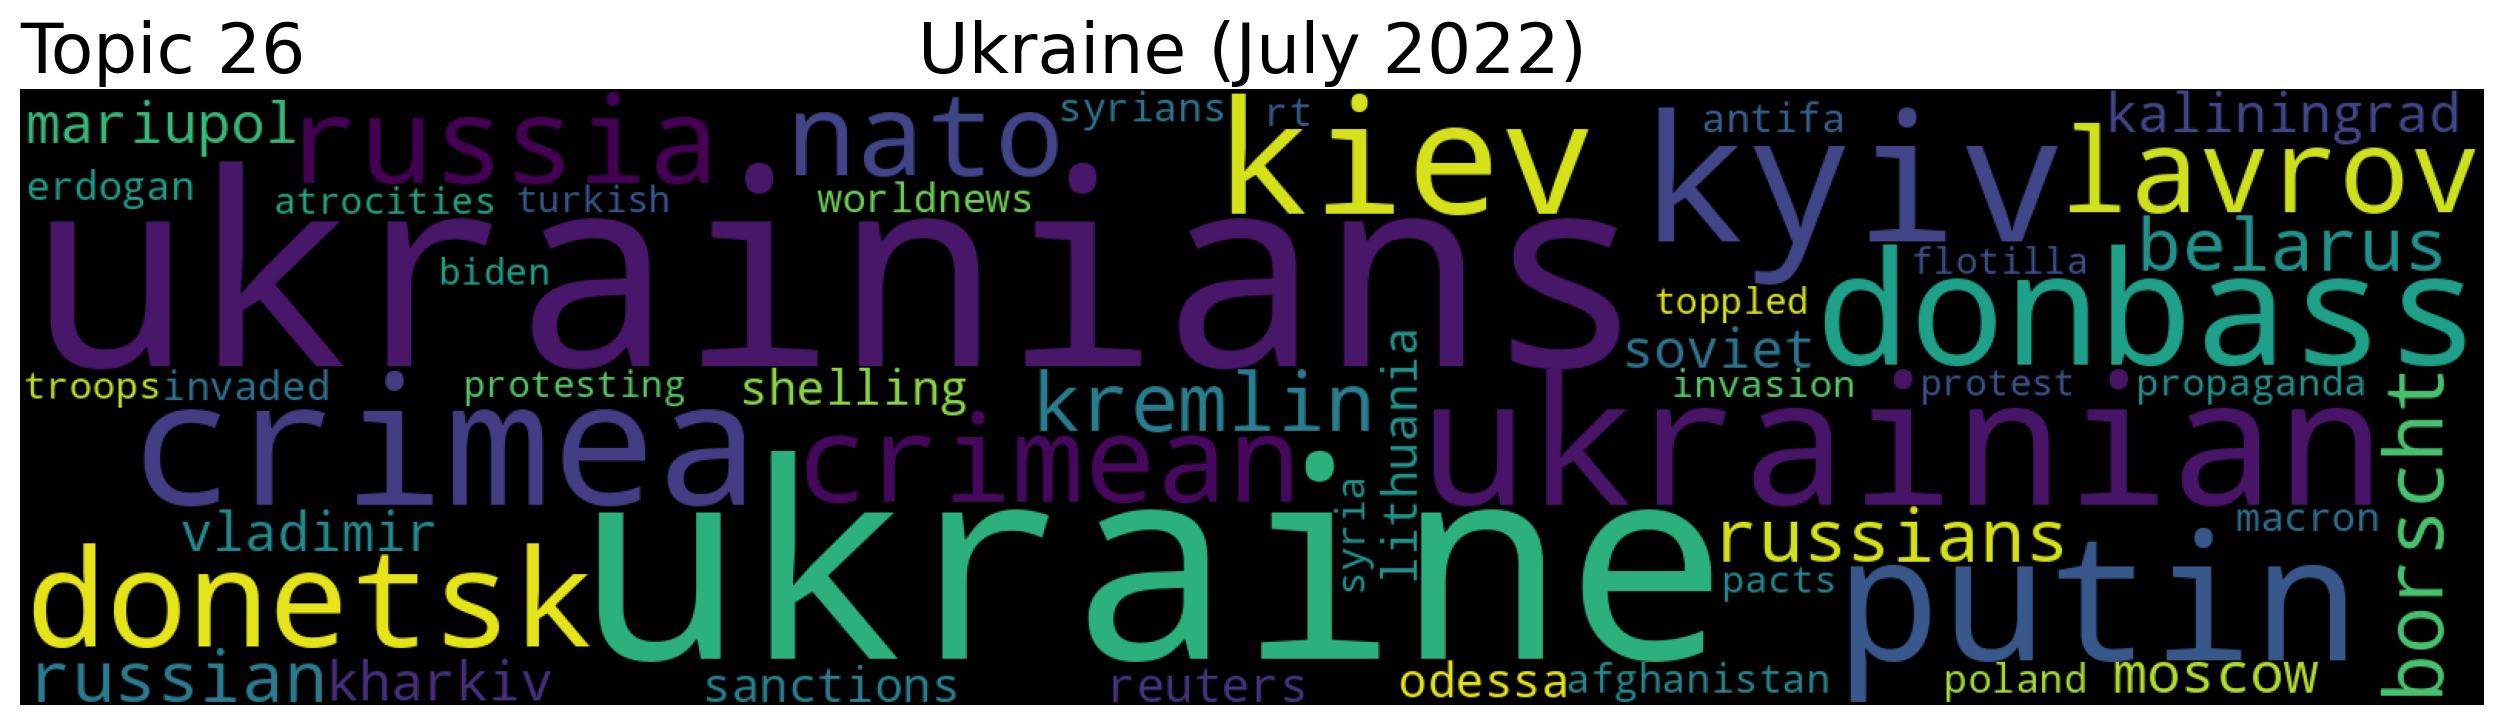

In [ ]:
model_july22.generate_topic_wordcloud(26)
plt.title("Ukraine (July 2022)", fontsize=25)
plt.show()
#Chose topic 24.

In [ ]:
topic_words, word_scores, topic_nums = model_july22.get_topics(27)
topic_num=26
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10)
#War, billion, pentagon were all very prevalent.

0
0.496582     ukraine
0.475009  ukrainians
0.473740   ukrainian
0.459801        kyiv
0.455595      crimea
0.445129       putin
0.443987     donbass
0.437604        kiev
0.433374     donetsk
0.428489     crimean

##October 2022

In [ ]:
#got rid of stop words in the tweets
oct_22_df = oct_22_df.loc[ ~oct_22_df["text"].isin(my_stop) ]

NameError: name 'oct_22_df' is not defined

In [ ]:
oct_22_df = oct_22_df.drop(oct_22_df[oct_22_df['text'].str.contains("https")].index)
#removed any text containing websites so "https" would not come up as a frequent word.
#no tweets with websites were used

###LDA

In [ ]:
Oct22 = Pipeline([
     ('tokenize', CountVectorizer(max_features=280, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=9))
    ])
#Tweet size max is 280 as of Jan. 2023  number of topics chosen was 9.

In [ ]:
np.random.seed(24601)

Oct22.fit_transform(oct_22_df["text"]);

In [ ]:
def plot_top_words(pipeline, n_top_words=10, grid_shape=[3,3]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='purple')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)


    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle("October 2022 Topics", fontsize=30)
    plt.show()


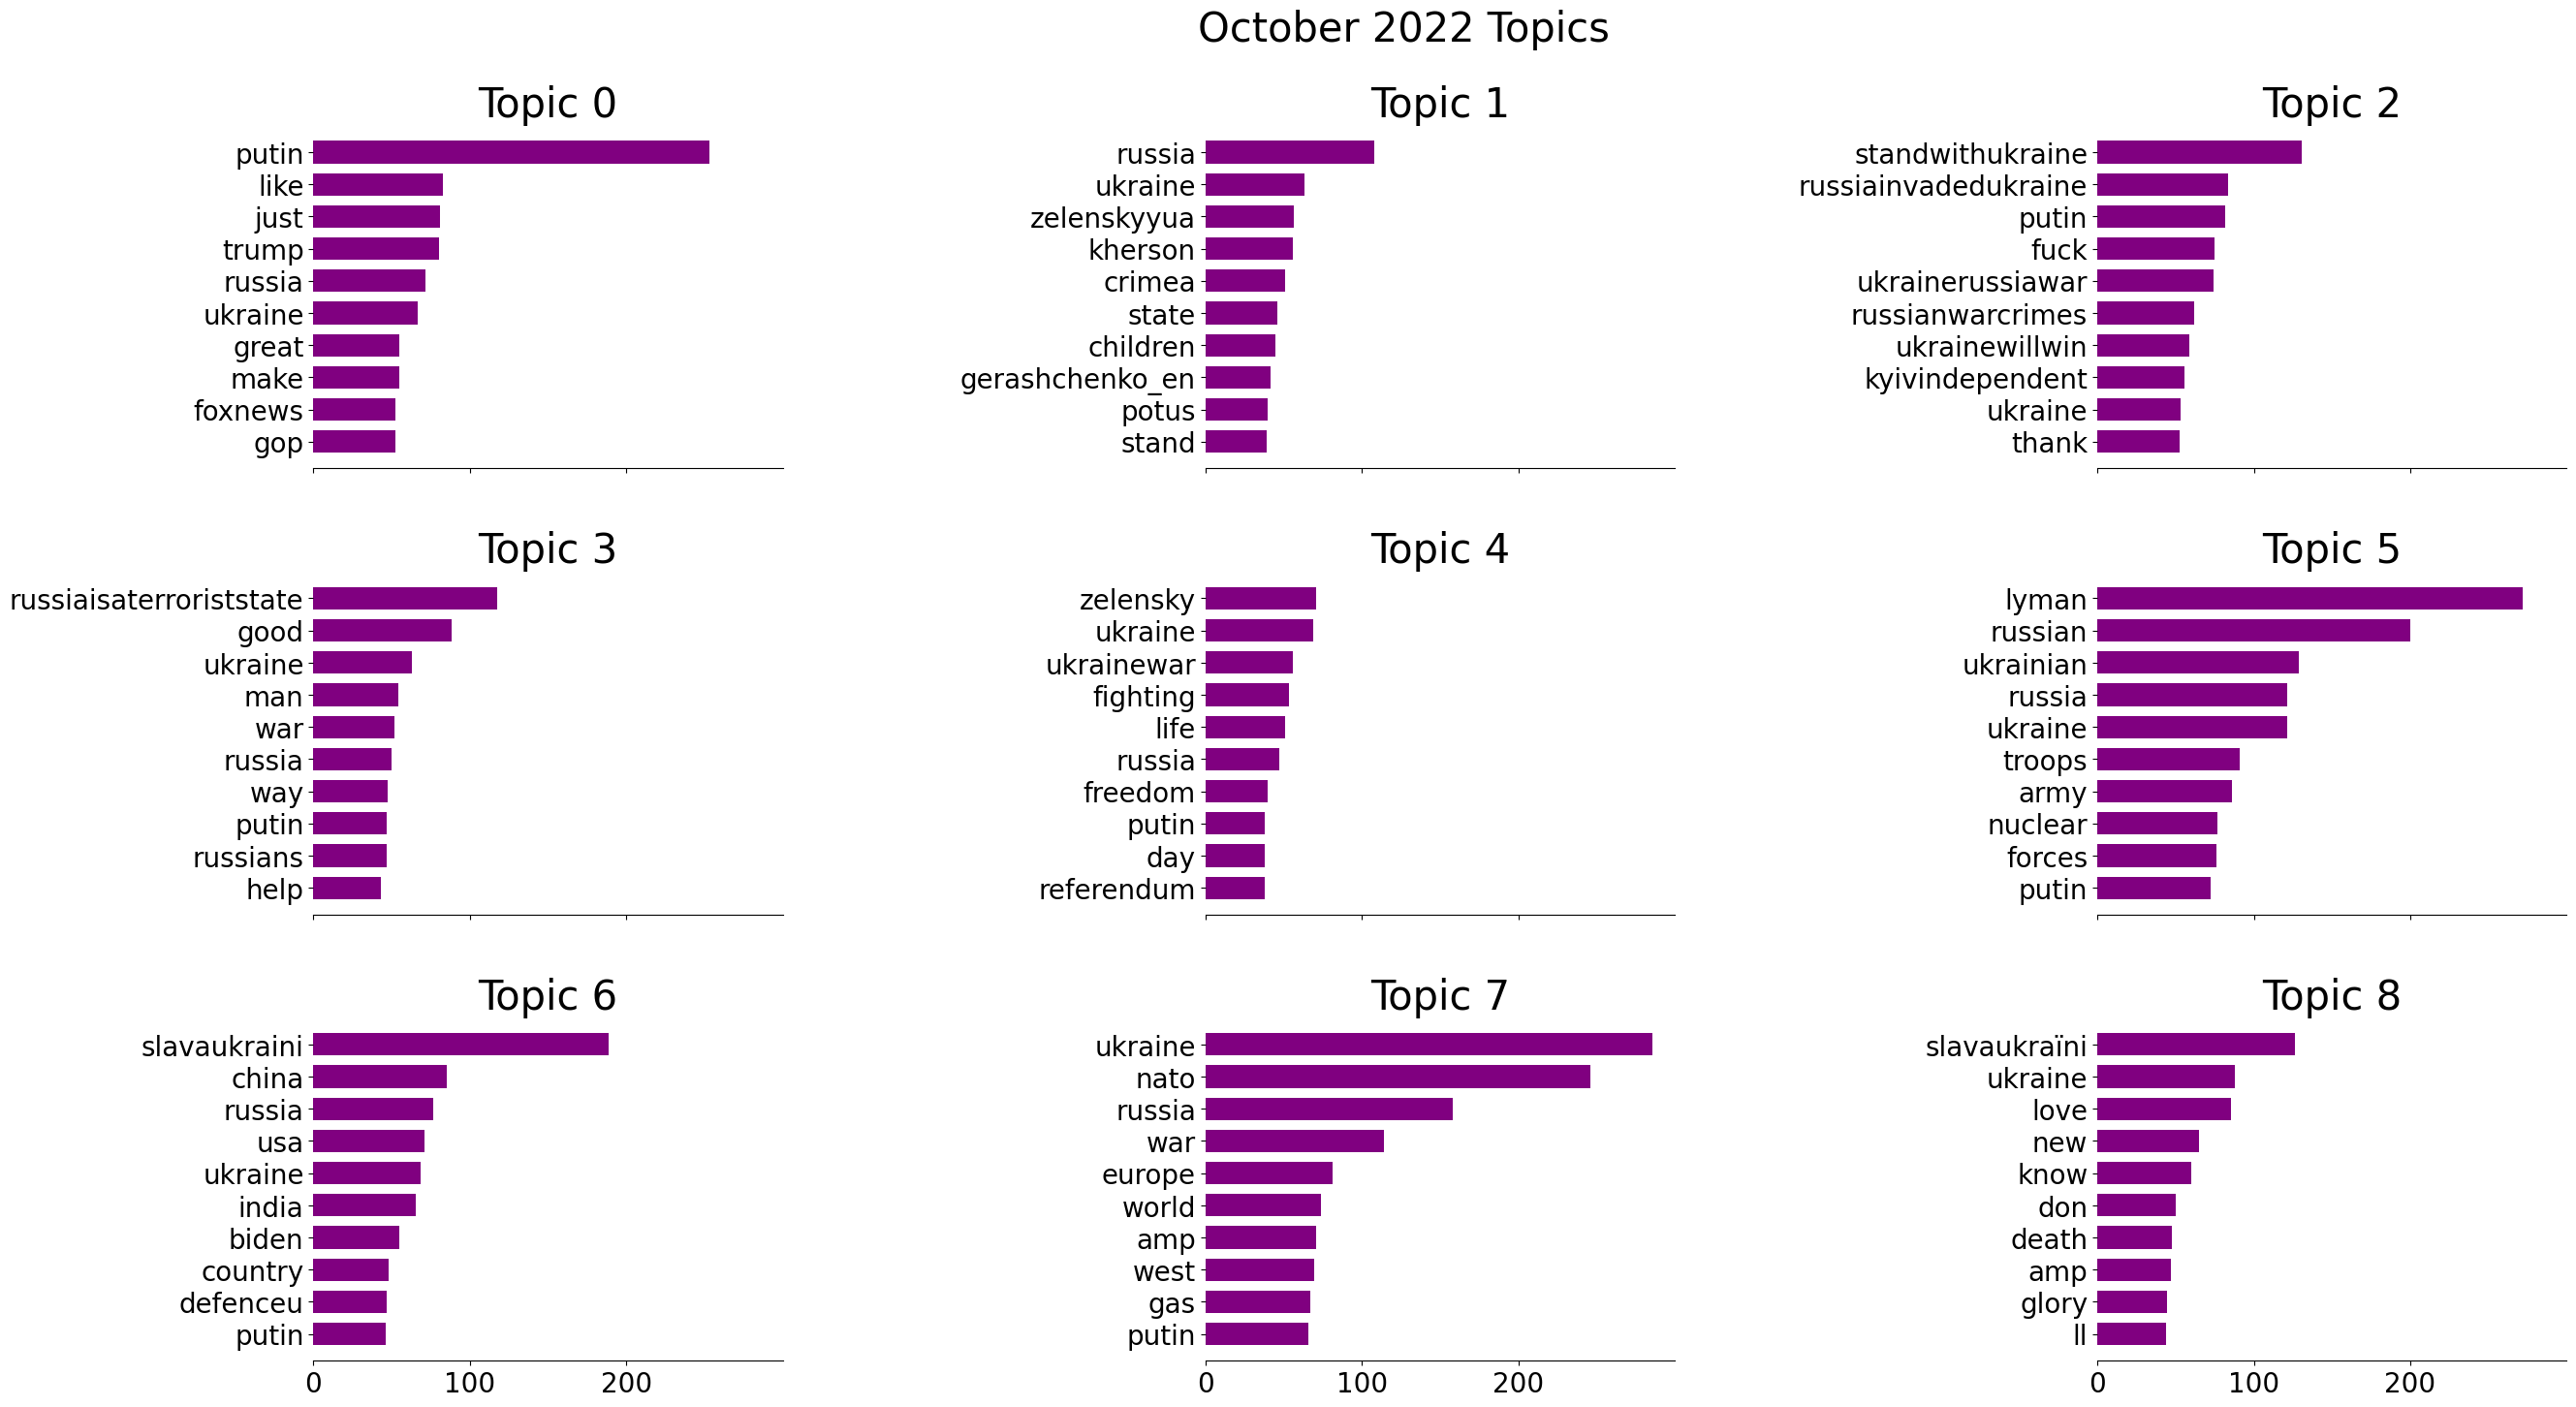

In [ ]:
plot_top_words(Oct22, 10, [3,3])
#In Topic 7, is aout world powers and their influence, Topic 4 is about Ukraine fighting, with its President the Top word
#Topic 2 is about siding with Ukraine in the war, with words such as standwithukraine and ukrainewillwin showing up

###Top2Vec

In [ ]:
documents_oct22 = list(oct_22_df["text"])
model_oct22 = Top2Vec(documents_oct22, embedding_model='universal-sentence-encoder')

2024-04-09 17:51:58,058 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-09 17:51:59,147 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-09 17:52:07,897 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-09 17:52:11,803 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-09 17:52:34,084 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-09 17:52:34,555 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_oct22.search_topics(keywords=["Crimea"], num_topics=5)
topic_words
#In Topic 1, Crimea was a top word. It was used to see how may have came up in other topics and what the context was


[array(['crimea', 'ukrainian', 'ukraine', 'ukrainians', 'donetsk', 'kyiv',
        'donbass', 'annexation', 'putin', 'kremlin', 'russia', 'russians',
        'russian', 'kharkiv', 'kadyrov', 'annexed', 'moscow', 'vladimir',
        'referendum', 'nato', 'sanctions', 'luhansk', 'invaded', 'wwiii',
        'invade', 'invasion', 'oblast', 'territories', 'syria', 'unsc',
        'poland', 'territory', 'liberated', 'nations', 'palestine',
        'borders', 'nukes', 'turkey', 'mobilization', 'fascist',
        'propaganda', 'dictator', 'nazi', 'veto', 'genocide', 'pipeline',
        'troops', 'democracy', 'countries', 'nuclear'], dtype='<U15'),
 array(['ukrainian', 'ukraine', 'ukrainians', 'crimea', 'donetsk', 'kyiv',
        'donbass', 'russians', 'russia', 'russian', 'kremlin', 'putin',
        'kharkiv', 'moscow', 'kadyrov', 'vladimir', 'annexation',
        'luhansk', 'wwiii', 'nato', 'sanctions', 'annexed', 'invaded',
        'syria', 'nazi', 'invade', 'invasion', 'referendum', 'poland

In [ ]:
topic_nums

array([183,  59, 164, 249, 392])

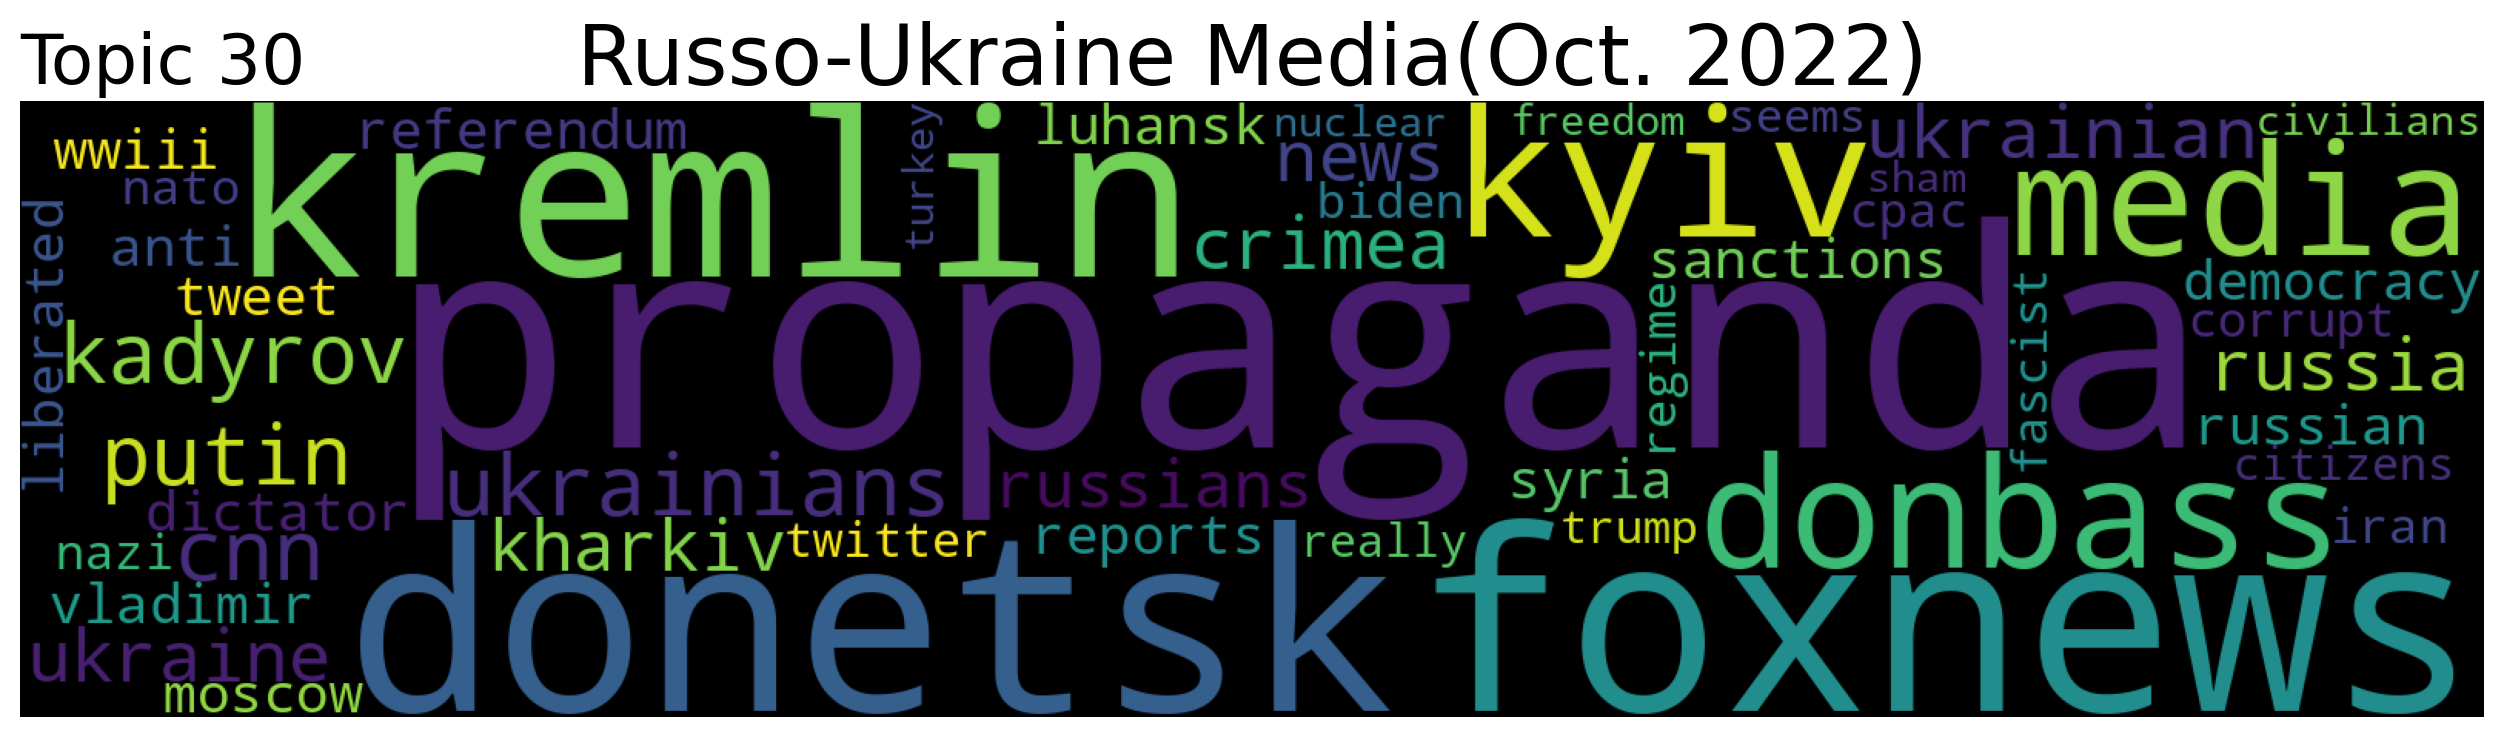

In [ ]:
model_oct22.generate_topic_wordcloud(30)
plt.title("Russo-Ukraine Media(Oct. 2022)", fontsize = "30")
plt.show()

In [ ]:
topic_words, word_scores, topic_nums = model_oct22.get_topics(31)
topic_num=30
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10)
#One of the top words is annexation. Even though Russia Annexed Crimea in Febraury people were still tweeting about it in October


0
0.386940  propaganda
0.378389     foxnews
0.362140     donetsk
0.359587     kremlin
0.356638        kyiv
0.339944     donbass
0.339892       media
0.332990  ukrainians
0.308877       putin
0.307295     kadyrov

##January 2023

In [ ]:
#got rid of stop words in the tweets
jan_23_df = jan_23_df.loc[ ~jan_23_df["text"].isin(my_stop) ]

In [ ]:
jan_23_df = jan_23_df.drop(jan_23_df[jan_23_df['text'].str.contains("https")].index)
#removed any text containing websites so "https" would not come up as a frequent word.
#no tweets with websites were used

###LDA

In [ ]:
Jan2023 = Pipeline([
     ('tokenize', CountVectorizer(max_features=280, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=9))
    ])
#Tweet size max is 280 as of Jan. 2023  number of topics chosen was 9.

In [ ]:
np.random.seed(24601)

Jan2023.fit_transform(jan_23_df["text"]);

In [ ]:

def plot_top_words(pipeline, n_top_words=10, grid_shape=[3,3]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='purple')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)


    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle("January 2023 Topics", fontsize=30)
    plt.show()


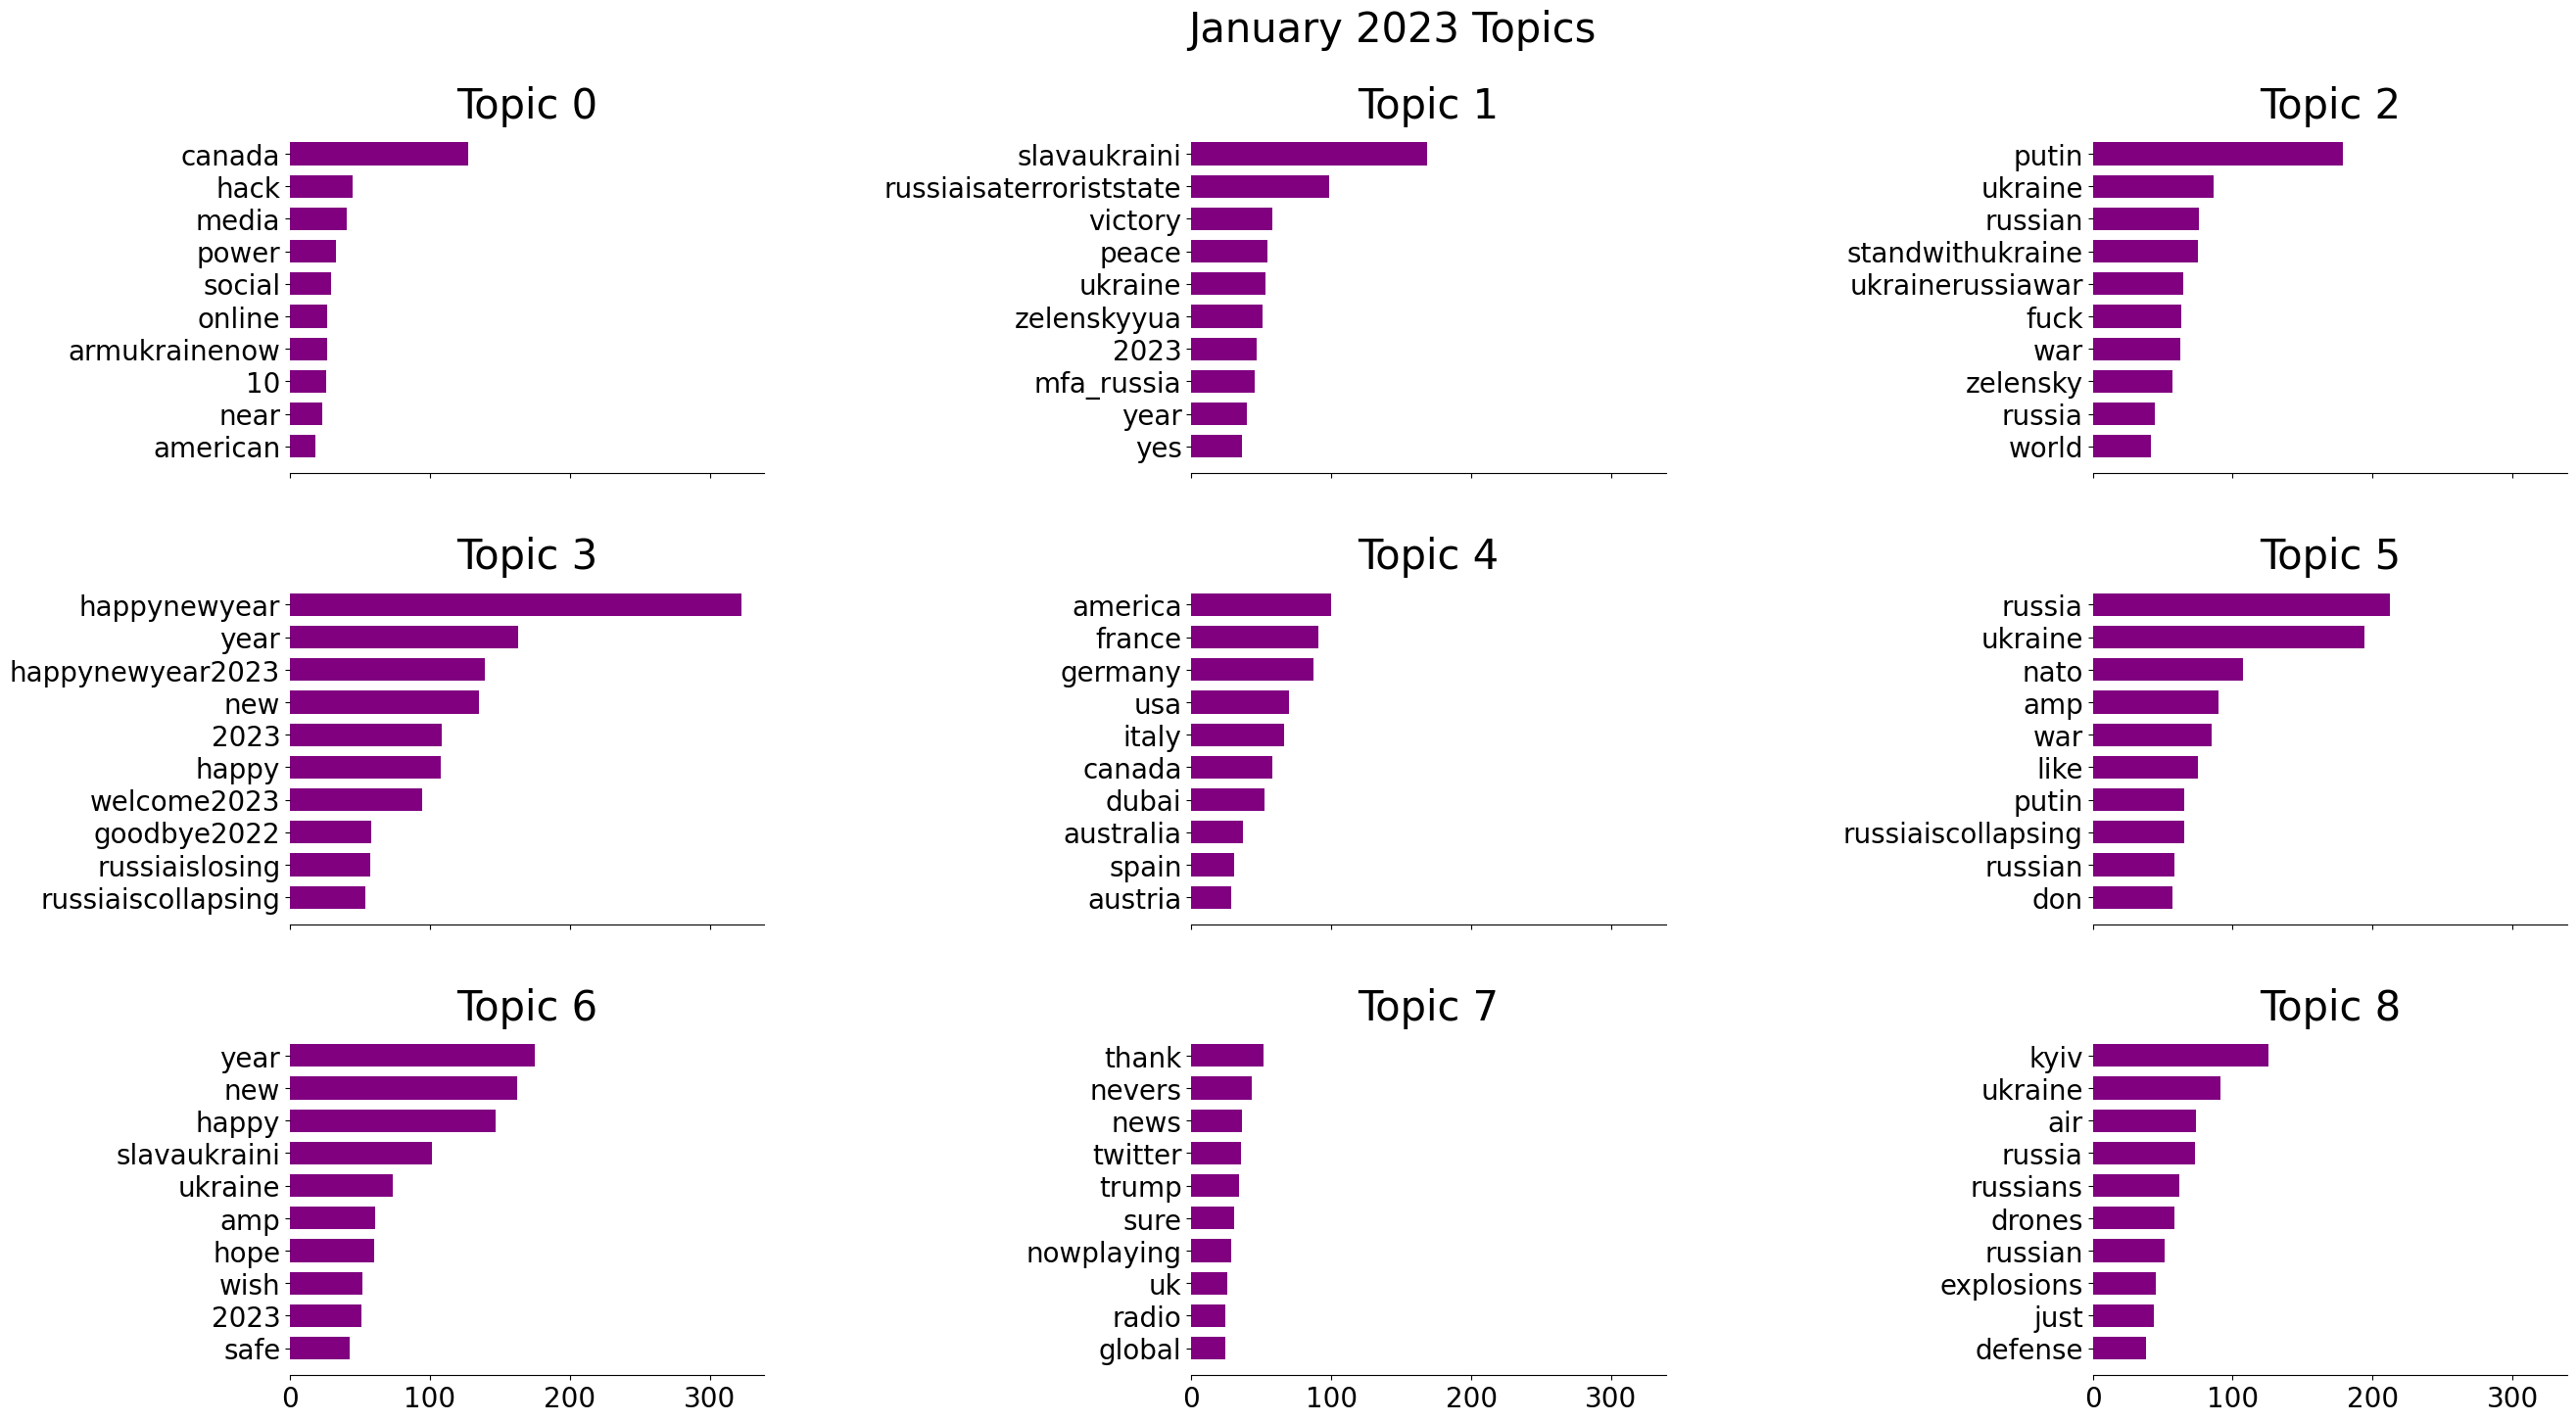

In [ ]:
plot_top_words(Jan2023, 10, [3,3])
#Happy New Year 2023 came up in two topics. Topic 1 is interesting with the first word, "slavaukraini" translating to
#glory to Ukraine and right underneath is "russianterroriststate"

###Top2Vec

In [ ]:
documents_jan23 = list(jan_23_df["text"])
model_jan23 = Top2Vec(documents_jan23, embedding_model='universal-sentence-encoder')

2024-04-09 17:54:03,651 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-09 17:54:04,427 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-09 17:54:12,027 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-09 17:54:16,144 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-09 17:54:31,993 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-09 17:54:32,260 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_jan23.search_topics(keywords=["peace"], num_topics=5)
topic_words
#The word chosen was peace, as shown in Topic 1

[array(['ukrainians', 'happy', 'peace', 'kyiv', 'wishing', 'wishes',
        'ukrainian', 'ukraine', 'newyear', 'freedom', 'year', 'hope',
        'happiness', 'wish', 'everyone', 'democracy', 'fireworks', 'putin',
        'an', 'slava', 'world', 'moscow', 'civilians', 'live', 'may',
        'russians', 'goodbye', 'russian', 'regime', 'un', 'nato', 'russia',
        'all', 'victory', 'citizens', 've', 'good', 'such', 're', 'anyone',
        'eu', 'global', 'any', 'every', 'iran', 'free', 'america',
        'yourself', 'who', 'dubai'], dtype='<U15'),
 array(['happy', 'wishing', 'newyear', 'year', 'wishes', 'fireworks',
        'happiness', 'wish', 'peace', 'hope', 'everyone', 'freedom',
        'good', 'an', 'goodbye', 'january', 'health', 'anyone', 'may',
        'love', 'world', 'yourself', 'dubai', 've', 'years', 'night',
        'welcome', 'great', 'kremlinrussia_e', 'live', 're', 'sure',
        'better', 'best', 'day', 'un', 'all', 'lot', 'new', 'friends',
        'thank', 'much',

In [ ]:
topic_nums

array([ 7,  2, 13, 40, 41])

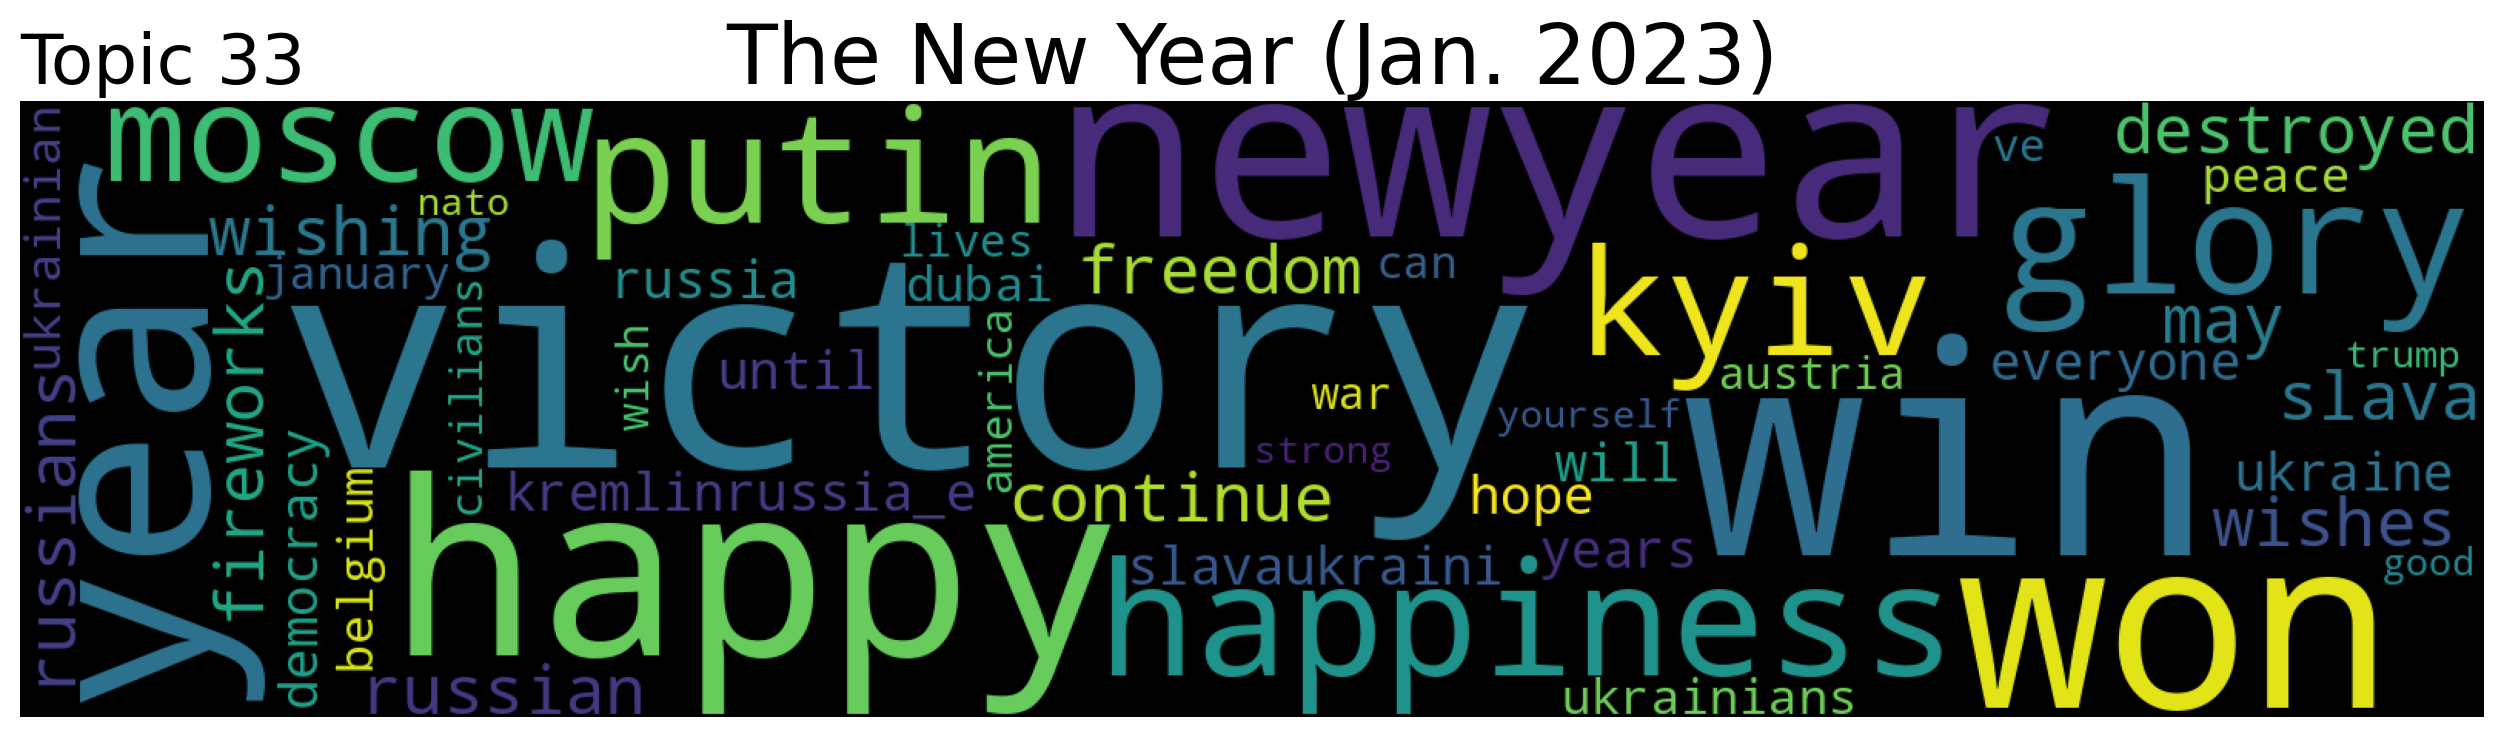

In [ ]:
model_jan23.generate_topic_wordcloud(33)
plt.title("The New Year (Jan. 2023)", fontsize = "30")
plt.show()

In [ ]:
topic_words, word_scores, topic_nums = model_jan23.get_topics(34)
topic_num=33
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10)
#the top words were words about the new year, but Ukraine and Kherson, a Ukrainian city also were prevalent

0
0.348942    victory
0.294968        win
0.257909      happy
0.250770    newyear
0.244219        won
0.223558       year
0.194806  happiness
0.185481      glory
0.158959      putin
0.158419       kyiv

In [ ]:
happy = jan_23_df[jan_23_df['text'].str.contains('happy')]
happy.head(12)

username  following  followers  totaltweets       tweetcreatedts  \
81          ikicek253         10          0           37  2023-01-01 00:01:39   
392           DanaSG4       1743        913         5864  2023-01-01 00:10:24   
452       anna_wdowka         66          3            8  2023-01-01 00:12:00   
596        wwillwales        318        211         3107  2023-01-01 00:15:42   
738       harrisonart       5000       4046        50899  2023-01-01 00:19:03   
765     codiusmaximus       1712        995         3804  2023-01-01 00:19:39   
775      alice_radley        105       5323        99459  2023-01-01 00:19:52   
1112       Litemup818        194         18          109  2023-01-01 00:28:25   
1190            pis_u       6608       9069       486533  2023-01-01 00:30:24   
1206          roscrad       1139        689          912  2023-01-01 00:30:40   
1306  BruceGorodetsky       1550       1319        12640  2023-01-01 00:33:03   
1399   Casper24790068        997        844          470  2023-01-01 00:35:34   

      retweetcount                                               text  \
81               0  I wish everyone (except ruzzians) happy new ye...   
392              1  @ZelenskyyUa @BooBookBooze Happy New Year Ukra...   
452              0  @NataliiaKulak We all hope it will be over soo...   
596              0  I wish all my friends and family a happy new y...   
738             18  @GOV2UK A happy new year to you all... let's m...   
765              0  @VikaSirko Happy New Year, may you and your lo...   
775              0  @moocowpup @JasonKander @SeanMastersons #Slava...   
1112             0  @itsnatlydenise #GORSADKYIV is trash much like...   
1190             0  @maria2christine @UkraineAidOps @Harri_Est ❤️🇺...   
1206             0  @NutBonkerFella Happy New Year and a happy #Ru...   
1306             0  @Gerashchenko_en They look like they’re forced...   
1399             0  #HappyNewYear2023 to all of you. May this year...   

                                               hashtags  
81    [{'text': 'ukraine', 'indices': [135, 143]}, {...  
392   [{'text': 'UkraineWillWin', 'indices': [140, 1...  
452    [{'text': 'SlavaUkraini', 'indices': [92, 105]}]  
596   [{'text': 'ukraine', 'indices': [74, 82]}, {'t...  
738   [{'text': 'ToriesOut178', 'indices': [204, 217...  
765   [{'text': 'NAFO', 'indices': [194, 199]}, {'te...  
775     [{'text': 'SlavaUkraini', 'indices': [40, 53]}]  
1112  [{'text': 'GORSADKYIV', 'indices': [16, 27]}, ...  
1190  [{'text': 'OneTeamOneFight', 'indices': [50, 6...  
1206  [{'text': 'RussiaIsLosing', 'indices': [43, 58]}]  
1306  [{'text': 'UkraineRussiaWar', 'indices': [110,...  
1399  [{'text': 'HappyNewYear2023', 'indices': [0, 1...

##April 2023

In [ ]:
#got rid of stop words in the tweets
apr_23_df = apr_23_df.loc[ ~apr_23_df["text"].isin(my_stop) ]

In [ ]:
apr_23_df = apr_23_df.drop(apr_23_df[apr_23_df['text'].str.contains("https")].index)
#removed any text containing websites so "https" would not come up as a frequent word.
#no tweets with websites were used

###LDA

In [ ]:
Apr23= Pipeline([
     ('tokenize', CountVectorizer(max_features=280, stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('lda', LatentDirichletAllocation(n_components=9))
    ])
#Tweet size max is 280 as of Jan. 2023  number of topics chosen was 9.

In [ ]:
np.random.seed(24601)

Apr23.fit_transform(apr_23_df["text"]);

In [ ]:

def plot_top_words(pipeline, n_top_words=10, grid_shape=[3,3]):

    feature_names = pipeline["tokenize"].get_feature_names_out()
    model = pipeline["lda"]
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color='purple')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)


    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle("April 2023 Topics", fontsize=30)
    plt.show()

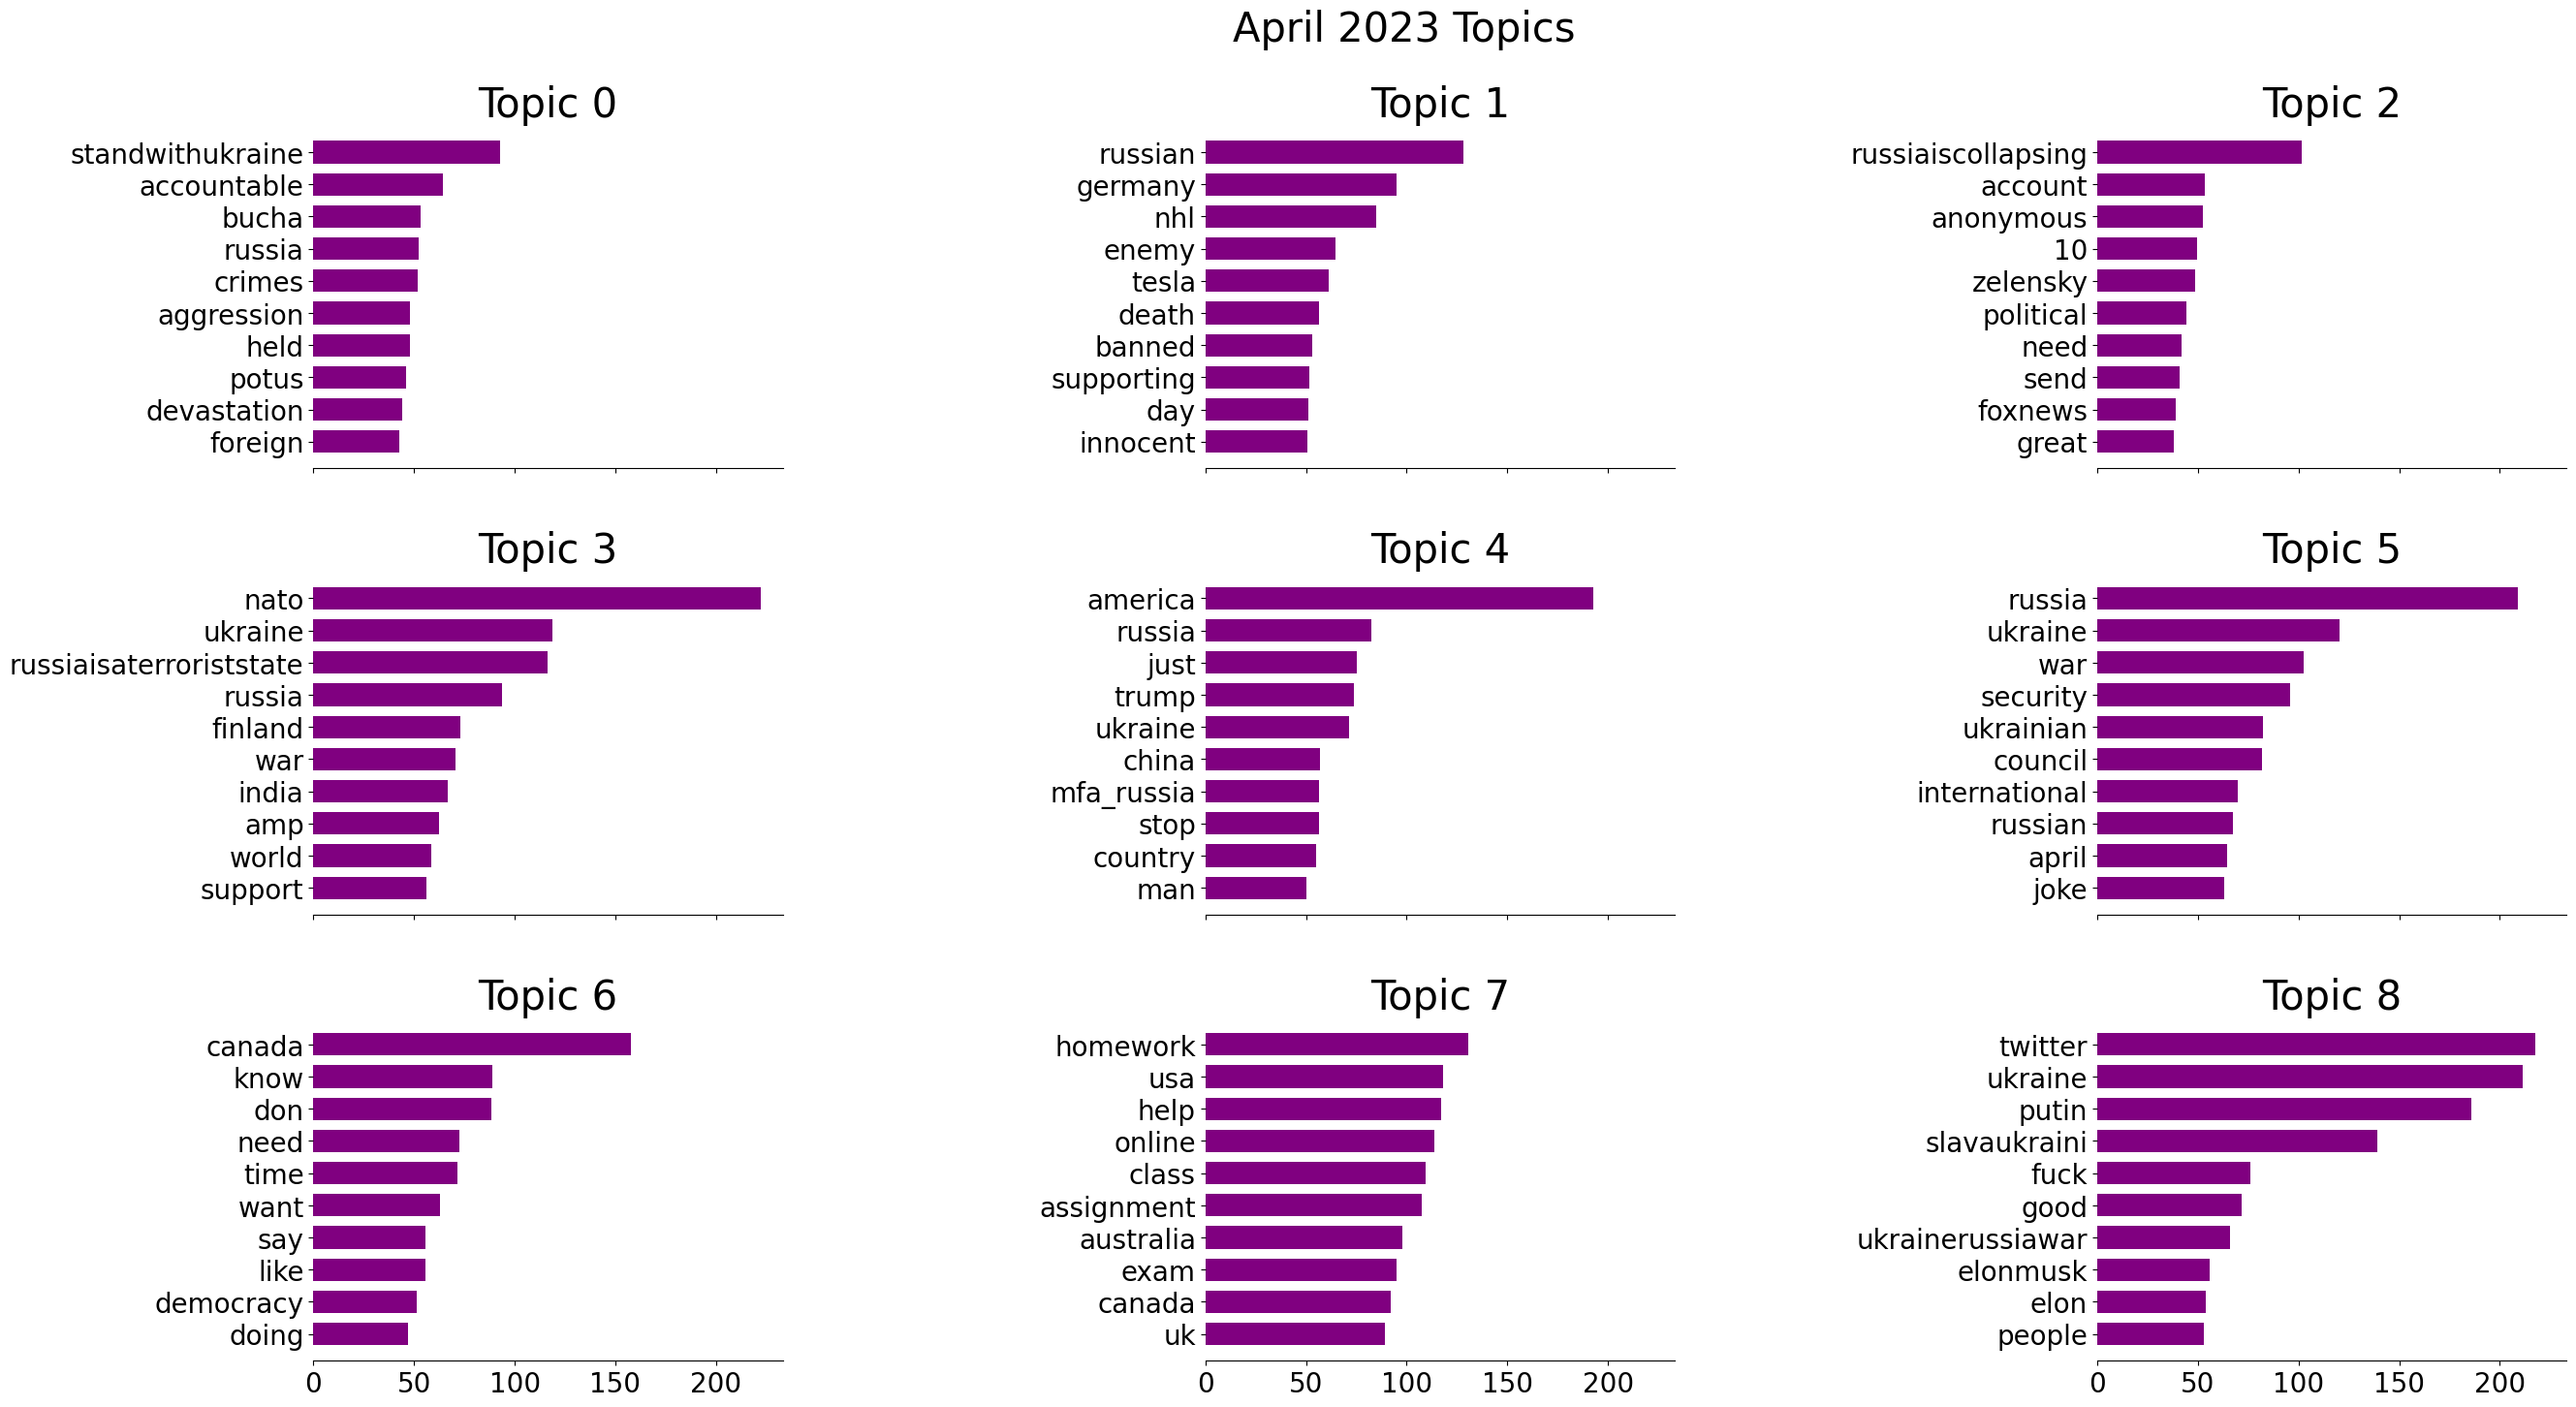

In [ ]:
plot_top_words(Apr23, 10, [3,3])
#Nato, and different allies for both counties were spread throughout topics

###Top2Vec

In [ ]:
documents_apr23 = list(apr_23_df["text"])
model_apr23 = Top2Vec(documents_apr23, embedding_model='universal-sentence-encoder')

2024-04-09 18:01:37,274 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-09 18:01:38,368 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-09 18:01:52,960 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-09 18:01:58,715 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-09 18:02:21,919 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-09 18:02:22,308 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_apr23.search_topics(keywords=["Russia"], num_topics=5)
topic_words
#Russia was used to see how it would compare/differ

[array(['russians', 'russia', 'russian', 'putin', 'moscow', 'belarus',
        'ukrainian', 'ukrainians', 'ukraine', 'donetsk', 'kyiv',
        'sanctions', 'brics', 'ovechkin', 'kharkiv', 'wwiii', 'finland',
        'nato', 'ru', 'nazi', 'poland', 'propaganda', 'syria', 'missiles',
        'hacked', 'provocation', 'uae', 'oblast', 'german', 'corrupt',
        'iran', 'tanks', 'cnn', 'crimes', 'raymondarroyo', 'biden',
        'western', 'fallout', 'nuclear', 'trump', 'militia', 'nations',
        'invasion', 'atrocities', 'india', 'civilians', 'fascism',
        'foreign', 'america', 'unsc'], dtype='<U15'),
 array(['ukrainian', 'donetsk', 'russia', 'putin', 'ukrainians', 'ukraine',
        'kyiv', 'russians', 'russian', 'belarus', 'moscow', 'kharkiv',
        'nato', 'wwiii', 'brics', 'sanctions', 'unsc', 'syria', 'militia',
        'invaded', 'propaganda', 'ru', 'ovechkin', 'provocation',
        'nations', 'invasion', 'oblast', 'finland', 'military', 'poland',
        'forces', 'nuc

In [ ]:
topic_nums

array([ 6, 38,  2, 29, 21])

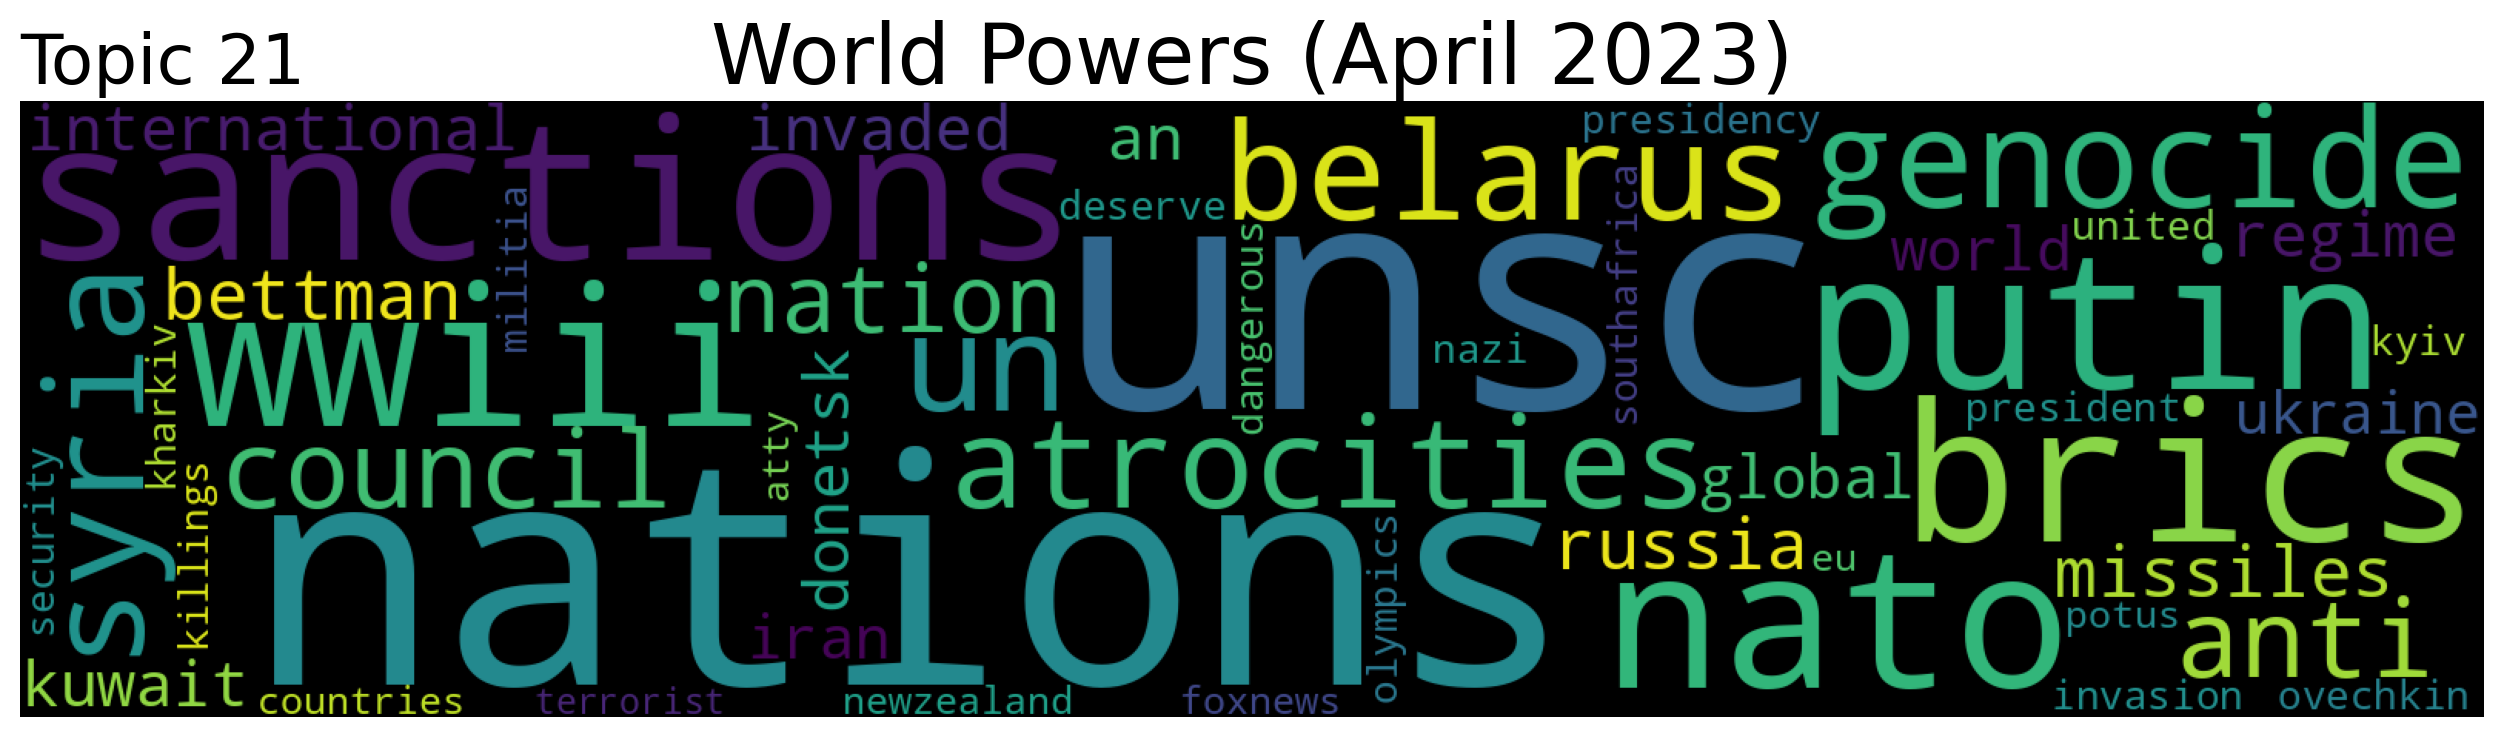

In [ ]:
model_apr23.generate_topic_wordcloud(21)
plt.title("World Powers (April 2023)", fontsize = "30")
plt.show()

In [ ]:
topic_words, word_scores, topic_nums = model_apr23.get_topics(22)
topic_num=21
pd.DataFrame(topic_words[topic_num], word_scores[topic_num]).head(10)
#Russian allies like India,China, and Iran were prevalent

0
0.377659       unsc
0.335005    nations
0.288983  sanctions
0.276647       nato
0.253709      wwiii
0.247494      putin
0.245635      brics
0.243095   genocide
0.221746      syria
0.217407    belarus

# Classification


## Combined

In [ ]:
# Merge all datasets
combined = pd.concat([april_22, july_22, oct_22, jan_23, apr_23])
combined

username  following  followers  totaltweets  \
0               Yaniela       1158        392        88366   
1              gregffff        122        881        99853   
2       ThanapornThon17        231         72         5481   
3        I_Protest_2021        399        377          301   
4          Marsh_Win_01        158         25         8982   
...                 ...        ...        ...          ...   
133452  DrClarkIPresume        567        245        98105   
133455       hasanjangj        398        592         1111   
133456  PaulinaKazanec2        132         50         8016   
133458          Hkjhgc2         17         47        27009   
133459        MnvlNoomi       4998       4396        13164   

                    tweetcreatedts  retweetcount  \
0       2022-04-01 00:00:00.000000          3412   
1       2022-04-01 00:00:00.000000           100   
2       2022-04-01 00:00:00.000000             9   
3       2022-04-01 00:00:00.000000           573   
4       2022-04-01 00:00:00.000000           190   
...                            ...           ...   
133452         2023-04-01 23:59:52            18   
133455         2023-04-01 23:59:56            11   
133456         2023-04-01 23:59:57           677   
133458         2023-04-01 23:59:57             0   
133459         2023-04-01 23:59:59            81   

                                                     text  \
0       ⚡The Ukrainian Air Force would like to address...   
1       Chernihiv oblast. Ukrainians welcome their lib...   
2       America 🇺🇸 is preparing for something worse th...   
3       JUST IN: #Anonymous has hacked &amp; released ...   
4       ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...   
...                                                   ...   
133452  Strike of the 9M79 missile to the AZOM factory...   
133455  400 days of full-scale Russian aggression. Ukr...   
133456  #NATO countries are planning to send two batta...   
133458  Russian missile strike in Ukrainian city Dnipr...   
133459  A aid from the great Ukrainian people to the f...   

                                                 hashtags  retweets?  
0                                                      []       True  
1       [{'text': 'russianinvasion', 'indices': [77, 9...       True  
2       [{'text': 'RussianUkrainianWar', 'indices': [7...       True  
3            [{'text': 'Anonymous', 'indices': [25, 35]}]       True  
4                                                      []       True  
...                                                   ...        ...  
133452  [{'text': 'Bakhmut', 'indices': [48, 56]}, {'t...       True  
133455  [{'text': 'StandWithUkraine', 'indices': [224,...       True  
133456  [{'text': 'NATO', 'indices': [0, 5]}, {'text':...       True  
133458  [{'text': 'Canada', 'indices': [77, 84]}, {'te...      False  
133459  [{'text': 'Ukraine', 'indices': [115, 123]}, {...       True  

[511965 rows x 9 columns]

In [ ]:
# Split into training/testing data
X = combined["text"]
y = combined["retweets?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Transform data
cv    = CountVectorizer(max_features=1000, stop_words='english')
X_train = cv.fit_transform(X_train)

tfidf = TfidfTransformer(use_idf=True)
X_train = tfidf.fit_transform(X_train)

In [ ]:
# Transform testing data
X_test = cv.transform(X_test)
X_test = tfidf.transform(X_test)

In [ ]:
# Create a classifier model
classifier = SGDClassifier()

# Then train the model using the training sets
classifier = classifier.fit(X_train, y_train)

In [ ]:
# Compare model predictions against training data
y_pred_train = classifier.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

0.8046863555125838

In [ ]:
# View where model gets it right/wrong
y_pred_train == y_train

60921      True
28262     False
180248     True
111487     True
15644     False
          ...  
17643      True
174847     True
13170      True
90434      True
54639     False
Name: retweets?, Length: 409572, dtype: bool

In [ ]:
# Print report of classifier performance
y_pred_test = classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

       False       0.77      0.40      0.53     28041
        True       0.81      0.95      0.88     74352

    accuracy                           0.80    102393
   macro avg       0.79      0.68      0.70    102393
weighted avg       0.80      0.80      0.78    102393



$$F_1 = \frac{1}{\text{recall}^{-1}+\text{precision}^{-1}}$$